# **Objectif de la mission**

## 1) Tester la classification ascendante hiérarchique.
## 2) Faire un dendrogramme.
## 3 Réaliser une ACP (Analyse en Composante Principale)
## 4) Utiliser la méthode des kmeans pour affiner l'analyse et s'assurer que les résultats sont identiques à ceux de l'ACP.

In [ ]:
# Importation des librairies

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

from sklearn import datasets
from sklearn.cluster import KMeans

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Analyse des données

## Import des données

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Openclassrooms/Colab Notebooks/Projet 9 - Méthode ACP et Knime/Données/df_final_2017.csv", index_col=0)
data.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)': 'Dispo_calories', 'Disponibilité de protéines en quantité (g/personne/jour)': 'Dispo_proteines', 'Disponibilité alimentaire en quantité (kg/personne/an)': 'Dispo_quantité', 'Disponibilité de matière grasse en quantité (g/personne/jour)': 'Dispo_mat_grasse', 'Taux de dépendance aux importations' : 'Taux d\'importation', 'Importations - Quantité' : 'Importations_Quantite', 'Exportations - Quantité' : 'Exportations_Quantite'}, inplace=True)
data

,Dispo_calories,Dispo_quantité,Dispo_mat_grasse,Dispo_proteines,Disponibilité intérieure,Exportations_Quantite,Importations_Quantite,Production,Taux d'importation,PIB_hab,Stabilite_politique,iso_o,iso_d,dist,Année,Valeur,Population
Zone,,,,,,,,,,,,,,,,,
Afghanistan,5.0,1.53,0.33,0.54,57.0,0.0,29.0,28.0,0.508772,2058.4,-2.80,FRA,AFG,5590.3810,2017,36296.113,36296113
Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,1667.0,0.242682,13860.3,-0.28,FRA,ZAF,9353.5520,2017,57009.756,57009756
Albanie,85.0,16.36,6.45,6.26,47.0,0.0,38.0,13.0,0.808511,12771.0,0.38,FRA,ALB,1603.5340,2017,2884.169,2884169
Algérie,22.0,6.38,1.50,1.97,277.0,0.0,2.0,275.0,0.007220,11737.4,-0.92,FRA,DZA,1340.3900,2017,41389.189,41389189
Allemagne,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1514.0,0.484186,53071.5,0.59,FRA,DEU,439.8984,2017,82658.409,82658409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,147.0,43.47,9.25,14.80,412.0,94.0,433.0,48.0,1.050971,67183.6,0.62,FRA,ARE,5249.5350,2017,9487.203,9487203
Équateur,83.0,19.31,6.35,6.15,341.0,0.0,0.0,340.0,0.000000,11617.9,-0.07,FRA,ECU,9367.0980,2017,16785.361,16785361
États-Unis d'Amérique,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,21914.0,0.006734,59914.8,0.29,FRA,USA,5838.1570,2017,325084.756,325084756


## Recherche de valeurs manquantes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, Afghanistan to Îles Salomon
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dispo_calories            170 non-null    float64
 1   Dispo_quantité            170 non-null    float64
 2   Dispo_mat_grasse          170 non-null    float64
 3   Dispo_proteines           170 non-null    float64
 4   Disponibilité intérieure  170 non-null    float64
 5   Exportations_Quantite     170 non-null    float64
 6   Importations_Quantite     170 non-null    float64
 7   Production                170 non-null    float64
 8   Taux d'importation        170 non-null    float64
 9   PIB_hab                   160 non-null    float64
 10  Stabilite_politique       164 non-null    float64
 11  iso_o                     141 non-null    object 
 12  iso_d                     141 non-null    object 
 13  dist                      141 non-null    float64
 

In [ ]:
data.isna().sum()

Dispo_calories               0
Dispo_quantité               0
Dispo_mat_grasse             0
Dispo_proteines              0
Disponibilité intérieure     0
Exportations_Quantite        0
Importations_Quantite        0
Production                   0
Taux d'importation           0
PIB_hab                     10
Stabilite_politique          6
iso_o                       29
iso_d                       29
dist                        29
Année                        0
Valeur                       0
Population                   0
dtype: int64

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())


In [ ]:
data.isna().sum()

Dispo_calories               0
Dispo_quantité               0
Dispo_mat_grasse             0
Dispo_proteines              0
Disponibilité intérieure     0
Exportations_Quantite        0
Importations_Quantite        0
Production                   0
Taux d'importation           0
PIB_hab                      0
Stabilite_politique          0
iso_o                       29
iso_d                       29
dist                         0
Année                        0
Valeur                       0
Population                   0
dtype: int64

## Elimination de colonnes inutiles pour le moment

In [ ]:
# Nous supprimons les colonnes non numériques, car elles ne peuvent être utilisées pour l'ACP.

data.drop(columns=["iso_o", "iso_d", "Année"], inplace=True)
data.head(5)

,Dispo_calories,Dispo_quantité,Dispo_mat_grasse,Dispo_proteines,Disponibilité intérieure,Exportations_Quantite,Importations_Quantite,Production,Taux d'importation,PIB_hab,Stabilite_politique,dist,Valeur,Population
Zone,,,,,,,,,,,,,,
Afghanistan,5.0,1.53,0.33,0.54,57.0,0.0,29.0,28.0,0.508772,2058.4,-2.80,5590.3810,36296.113,36296113
Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,1667.0,0.242682,13860.3,-0.28,9353.5520,57009.756,57009756
Albanie,85.0,16.36,6.45,6.26,47.0,0.0,38.0,13.0,0.808511,12771.0,0.38,1603.5340,2884.169,2884169
Algérie,22.0,6.38,1.50,1.97,277.0,0.0,2.0,275.0,0.007220,11737.4,-0.92,1340.3900,41389.189,41389189
Allemagne,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1514.0,0.484186,53071.5,0.59,439.8984,82658.409,82658409


In [ ]:
data.columns.tolist()

['Dispo_calories',
 'Dispo_quantité',
 'Dispo_mat_grasse',
 'Dispo_proteines',
 'Disponibilité intérieure',
 'Exportations_Quantite',
 'Importations_Quantite',
 'Production',
 "Taux d'importation",
 'PIB_hab',
 'Stabilite_politique',
 'dist',
 'Valeur',
 'Population']

## Test de normalité des données

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(data)
print(f'Test de Shapiro-Wilk: stat={stat}, p={p}')

Test de Shapiro-Wilk: stat=0.04203355312347412, p=0.0


La p-value est inférieur au seuil de 0.05 --> Les données ne suivent pas une distribution normale.

**Les données ne suivent pas une loi normale, il nois faudra donc utiliser le test de spearman dans la matrice de corrélation à la place du test de pearson**

## Normalisation des données

On normalise les données afin d'avoir une analyse la plus fidèle possible, en étant sur la même échelle.

In [ ]:
#Transformation en array Numpy
#Indexation selon les pays par la fonction .set_index()

X = data.values
X.shape

(170, 14)

In [ ]:
from sklearn import preprocessing

# Centrage / réduction des données pour que nos données soit à la même échelle !

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [ ]:
# Nouveau DataFrame avec les données centré, réduite et le nom de chaque variables !

df_std = pd.DataFrame(X_scaled, columns=data.columns)
df_std

,Dispo_calories,Dispo_quantité,Dispo_mat_grasse,Dispo_proteines,Disponibilité intérieure,Exportations_Quantite,Importations_Quantite,Production,Taux d'importation,PIB_hab,Stabilite_politique,dist,Valeur,Population
0,-1.160351,-1.190622,-1.100557,-1.187674,-0.289165,-0.228559,-0.325217,-0.277627,0.098136,-0.955104,-3.077847,-0.135008,-0.044439,-0.044439
1,1.122020,0.967543,1.030243,1.239459,0.655926,-0.091385,2.280627,0.383122,-0.416572,-0.312549,-0.219841,0.894772,0.090516,0.090516
2,0.162762,-0.253690,0.361382,-0.164593,-0.293750,-0.228559,-0.276861,-0.283674,0.677932,-0.371856,0.528684,-1.225995,-0.262126,-0.262126
3,-0.879190,-0.884208,-0.821069,-0.931904,-0.188282,-0.228559,-0.470284,-0.178051,-0.872034,-0.428131,-0.945684,-1.298004,-0.011256,-0.011256
4,-0.068782,-0.057206,-0.185651,0.139469,0.482132,1.178015,4.042929,0.321441,0.050579,1.822304,0.766851,-1.544420,0.257623,0.257623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1.188175,1.459069,1.030243,1.362873,-0.126376,-0.023887,1.845424,-0.269564,1.146932,2.590637,0.800875,-0.228279,-0.219106,-0.219106
166,0.129685,-0.067314,0.337494,-0.184268,-0.158934,-0.228559,-0.481030,-0.151847,-0.886000,-0.434637,0.018326,0.898479,-0.171556,-0.171556
167,2.378978,2.230474,2.363187,2.280426,8.060744,7.810252,0.179833,8.545523,-0.872975,2.194887,0.426612,-0.067205,1.837091,1.837091
168,-1.243046,-1.279071,-1.172221,-1.277104,-0.308883,-0.228559,-0.475657,-0.283271,-0.747833,-0.957107,-1.807622,-0.137164,0.412305,0.412305


Les données sont bien centré autour de 0 !

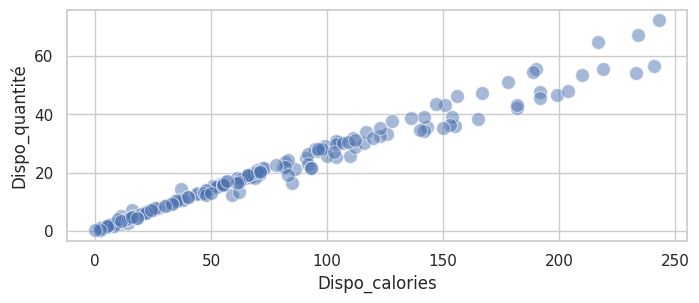

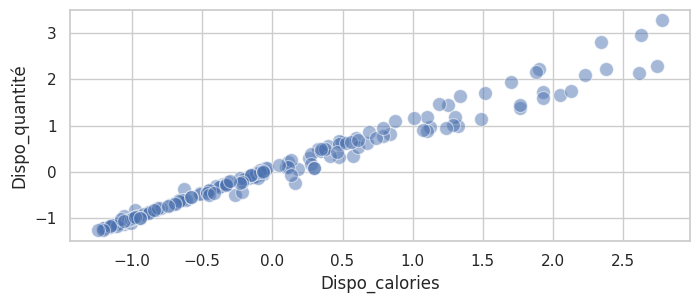

In [ ]:
# Exemple avec la disponibilité de calories et de proteines !

plt.figure(figsize=(8, 3))
sns.scatterplot(data=data, x='Dispo_calories', y='Dispo_quantité', s=100, alpha=.5)

plt.show()

plt.figure(figsize=(8, 3))
sns.scatterplot(data=df_std, x='Dispo_calories', y='Dispo_quantité', s=100, alpha=.5)

plt.show()

On voit bien ici le changement d'échelle !

## Classification ascendante hiérarchique avec un dendrogramme

In [ ]:
# Clustering hiérarchique: création d'une Matrice des liens selon la Méthode de Ward

Z = linkage(X_scaled, method="ward")
seuil_coupure = 13  # Seuil de coupure du dendrogramme

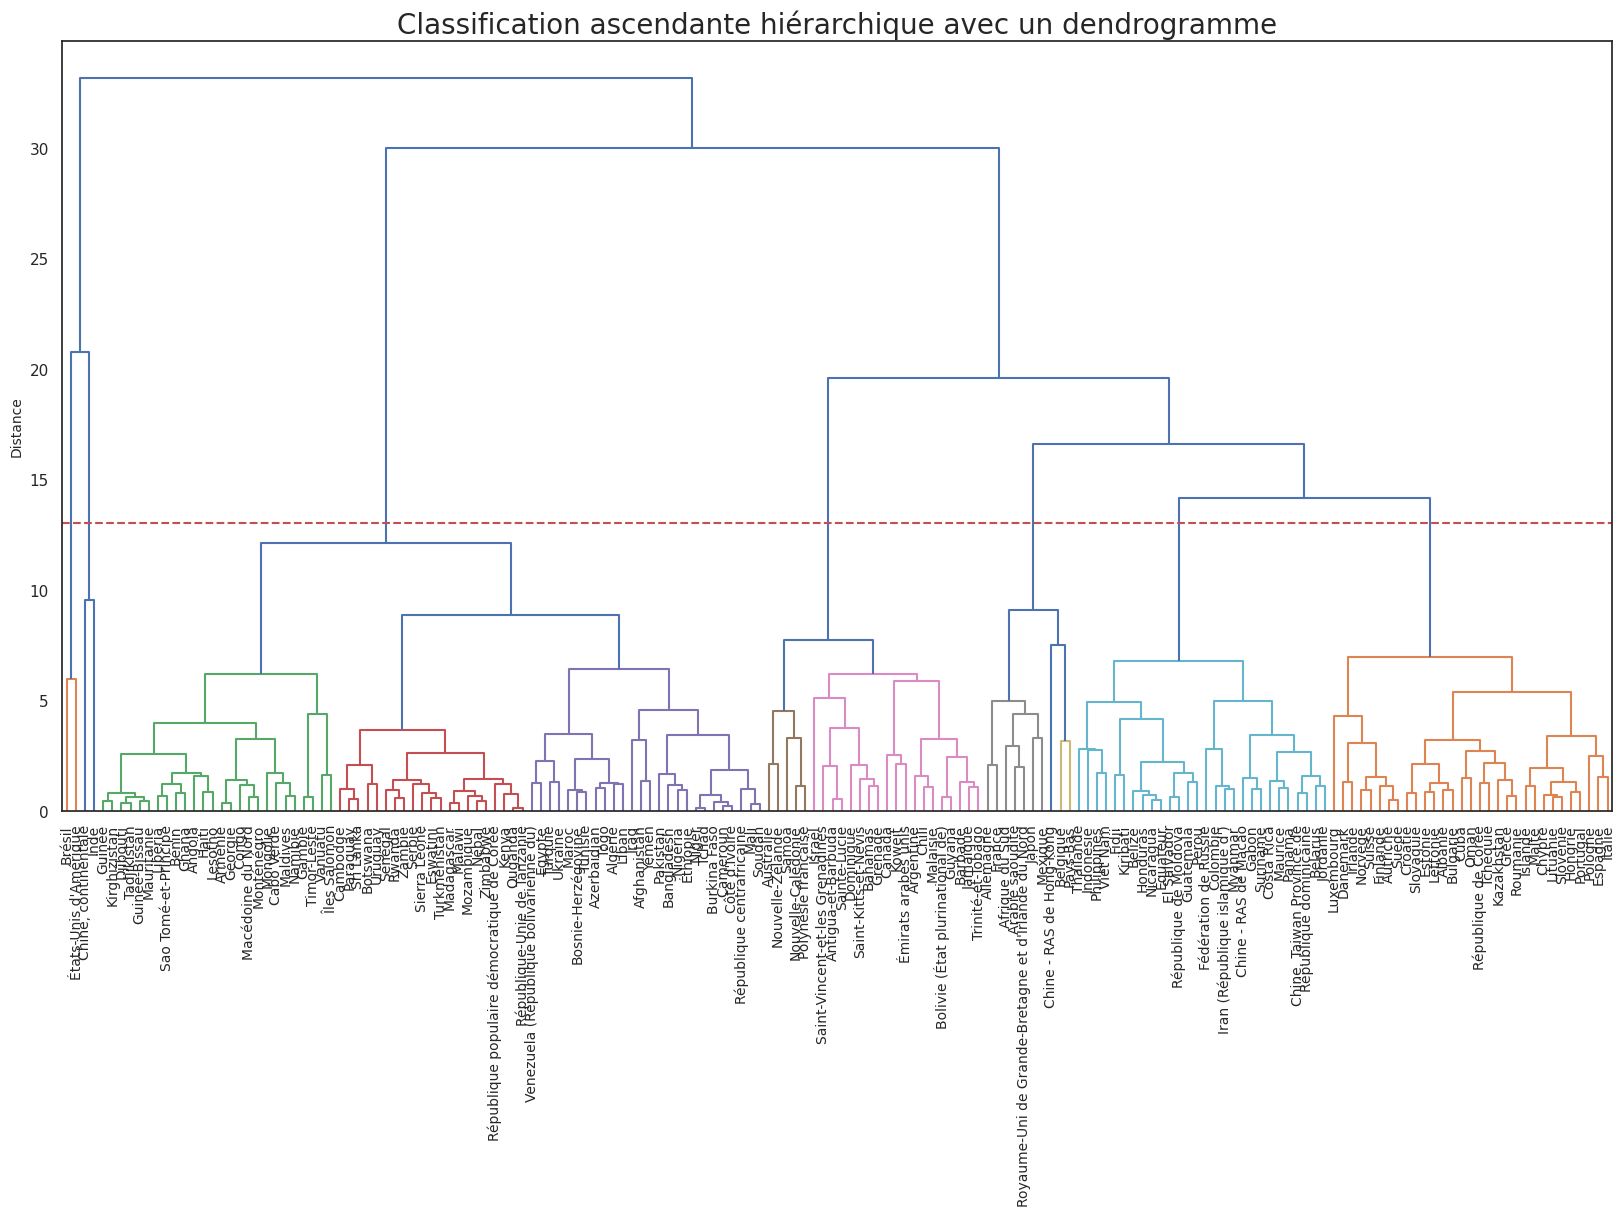

In [ ]:
# Affichage d'un premier dendrogramme global !

fig =plt.figure(figsize=(20,10))
sns.set_style('white')
plt.title('Classification ascendante hiérarchique avec un dendrogramme', fontsize=20)
plt.ylabel('Distance', fontsize=10)

dendrogram(Z, labels = data.index, leaf_font_size=10, color_threshold=7, orientation='top')
plt.axhline(y=seuil_coupure, color='r', linestyle='--')
plt.savefig("dendrogramme.png")
plt.show()

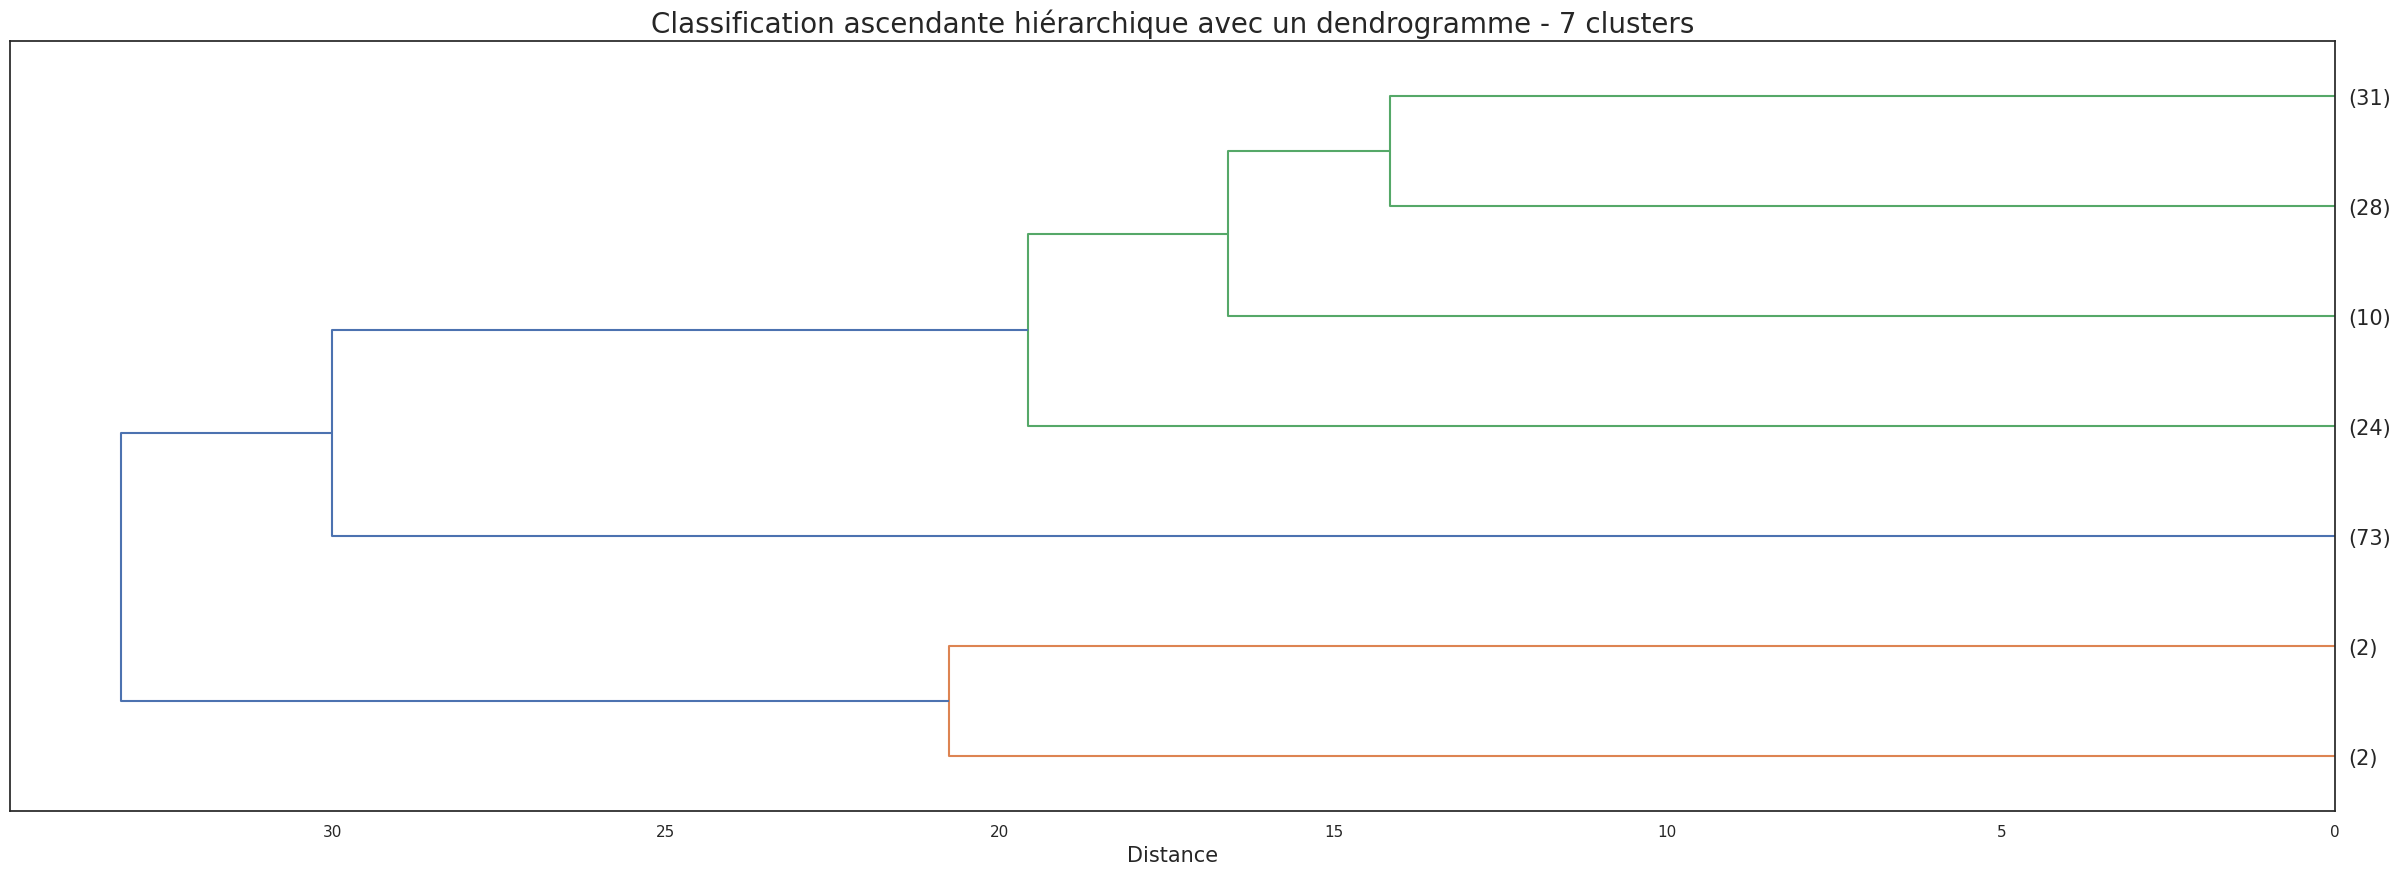

In [ ]:
# Coupage du dendrogramme en 7 groupes pour avoir une première idée du partitionnement. P permet de spécifier le nombre de cluster affichés.

fig = plt.figure(figsize=(30,10))
plt.title('Classification ascendante hiérarchique avec un dendrogramme - 7 clusters', fontsize=20)
plt.xlabel('Distance', fontsize=15)

dendrogram(Z, labels = data.index, p=7, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.savefig("dendrogramme_clusters7.png")
plt.show()

In [ ]:
# Identification des 7 groupes obtenus
groupes_cah = fcluster(Z, 7, criterion='maxclust')
print('Numérotation de nos groupes : ' + str(np.unique(groupes_cah)))

# Index trié des groupes
idg = np.argsort(groupes_cah)

# Affichage des pays selon leurs groupes
df_pays_groupe = pd.DataFrame(data.index[idg], groupes_cah[idg]).reset_index()
df_pays_groupe = df_pays_groupe.rename(columns={'index':'Groupe'})

Numérotation de nos groupes : [1 2 3 4 5 6 7]


In [ ]:
# Intégration des groupes dans nos données de départ représenté par le dataframe "data"
# Jointure interne nécessaire pour parvenir à agréger nos données

df_groupes_cah = pd.merge(data, df_pays_groupe, on='Zone')

In [ ]:
# Préparation de sous-ensembles permettant de caractériser les groupes un à un

df_groupe1_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 1]
df_groupe2_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 2]
df_groupe3_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 3]
df_groupe4_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 4]
df_groupe5_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 5]

In [ ]:
df_groupe4_cah.head()

,Zone,Dispo_calories,Dispo_quantité,Dispo_mat_grasse,Dispo_proteines,Disponibilité intérieure,Exportations_Quantite,Importations_Quantite,Production,Taux d'importation,PIB_hab,Stabilite_politique,dist,Valeur,Population,Groupe
6,Antigua-et-Barbuda,233.0,54.10,17.55,17.77,7.0,0.0,7.0,0.0,1.000000,19840.3,0.75,6708.77,95.426,95426,4
8,Argentine,182.0,42.24,13.84,13.53,1962.0,207.0,8.0,2161.0,0.004077,23597.1,0.17,11072.25,43937.140,43937140,4
10,Australie,192.0,47.65,13.45,16.60,1171.0,42.0,16.0,1269.0,0.013664,48398.5,0.90,16975.46,24584.620,24584620,4
13,Bahamas,182.0,43.17,13.33,14.61,26.0,0.0,24.0,6.0,0.923077,35911.7,0.99,7209.45,381.755,381755,4
15,Barbade,199.0,46.78,14.85,15.33,17.0,0.0,2.0,15.0,0.117647,15800.4,0.97,6882.34,286.232,286232,4


## Etude et représentation graphique de certaines variables des groupes

### Variable "Dispo_proteines"

<Axes: xlabel='Dispo_proteines', ylabel='Density'>

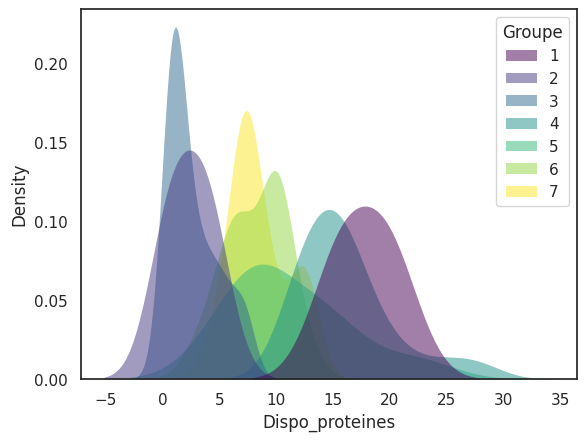

In [ ]:
sns.kdeplot(
   data=df_groupes_cah, x="Dispo_proteines", hue="Groupe",
   fill=True, common_norm=False, palette="viridis",
   alpha=.5, linewidth=0,
)



**Disponibilité en protéines** :
* Beaucoup de pays du groupe 2 et 3 ont un faible accès aux protéines.
*Le groupe 5 et 1 ont un bon accès aux protéines.


### Variable Importations_Quantite

<Axes: xlabel='Importations_Quantite', ylabel='Density'>

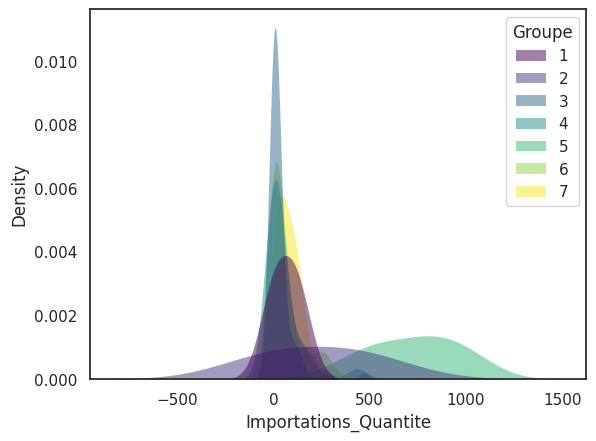

In [ ]:
sns.kdeplot(
   data=df_groupes_cah, x="Importations_Quantite", hue="Groupe",
   fill=True, common_norm=False, palette="viridis",
   alpha=.5, linewidth=0,
)



**Quantité de poulet importés**:
* Le groupe 5 importe le plus de poulet
* Le groupe 3, 4 et 7 importent peu de poulet.

<Axes: xlabel='Stabilite_politique', ylabel='Density'>

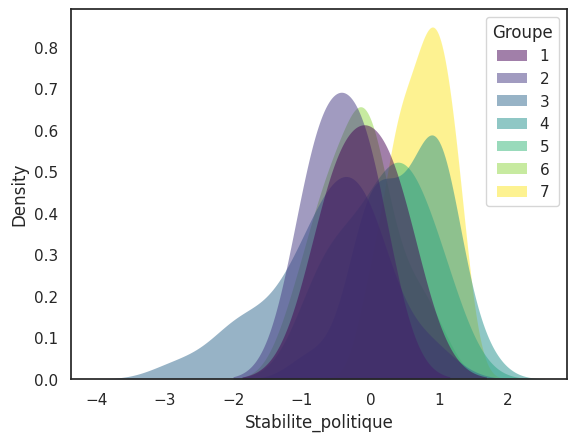

In [ ]:
sns.kdeplot(
   data=df_groupes_cah, x="Stabilite_politique", hue="Groupe",
   fill=True, common_norm=False, palette="viridis",
   alpha=.5, linewidth=0,
)

**Stabilité politique** :
* Le groupe 4, 5 et 7 sont les plus stables politiquement.
* Le groupe 3 est assez instable politiquement.

In [ ]:
# Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse
# On ne peut utiliser de valeurs non numériques dans notre groupby. On choisit de ne pas prendre en compte la colonne Zone pour la calcul par la moyenne.

df_groupes_cah.loc[:, ~df_groupes_cah.columns.isin(['Zone'])].groupby('Groupe').mean()


,Dispo_calories,Dispo_quantité,Dispo_mat_grasse,Dispo_proteines,Disponibilité intérieure,Exportations_Quantite,Importations_Quantite,Production,Taux d'importation,PIB_hab,Stabilite_politique,dist,Valeur,Population
Groupe,,,,,,,,,,,,,,
1,211.500000,51.855000,15.085000,17.805000,14124.000000,3957.500000,63.000000,18057.500000,0.003517,37219.700000,-0.090000,7623.281500,2.664593e+05,2.664593e+08
2,33.000000,7.275000,2.570000,2.355000,10911.000000,290.000000,226.000000,10890.500000,0.012444,12891.923438,-0.423079,6338.987829,1.379849e+06,1.379849e+09
3,25.808219,7.590548,1.623836,2.610822,160.506849,10.397260,30.136986,143.863014,0.466218,7488.618365,-0.633973,5912.857017,2.538607e+04,2.538607e+07
4,180.708333,47.372917,12.450000,16.082917,378.291667,29.041667,48.458333,375.708333,0.525391,26161.745573,0.529903,9164.378096,8.317845e+03,8.317845e+06
5,109.100000,29.087000,6.793000,11.217000,1653.700000,433.500000,725.700000,1441.200000,0.967080,39148.484688,0.191384,5237.773387,5.923668e+04,5.923668e+07
6,90.178571,24.633929,6.120714,8.166071,750.750000,41.285714,55.107143,738.607143,0.207064,13651.256920,-0.170440,8338.045854,3.649669e+04,3.649669e+07
7,79.064516,21.738387,4.753548,8.481290,273.129032,77.516129,79.967742,300.774194,0.507183,41408.601512,0.735484,2222.115122,1.194084e+04,1.194084e+07


* On remarque que le groupe 1 et le groupe 4 ont le plus accès aux protéines.
* Le groupe 2, 3 , 6 et 7 ont un faible accès aux protéines. Ces groupes ont donc un besoin d'accès en protéine.
* Le groupe le plus pauvre avec le PIB_hab le plus faible est le groupe 3.

**Premiers résultats** :
* A première vue, les pays les plus susceptibles d'avoir d'être client de l'entreprise se situe dans les groupes 2, 6 et 7.

* Le groupe 3 est à la fois le plus pauvre et le plus instable politiquement.

In [ ]:
df_groupes_cah

,Zone,Dispo_calories,Dispo_quantité,Dispo_mat_grasse,Dispo_proteines,Disponibilité intérieure,Exportations_Quantite,Importations_Quantite,Production,Taux d'importation,PIB_hab,Stabilite_politique,dist,Valeur,Population,Groupe
0,Afghanistan,5.0,1.53,0.33,0.54,57.0,0.0,29.0,28.0,0.508772,2058.4,-2.80,5590.3810,36296.113,36296113,3
1,Afrique du Sud,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,1667.0,0.242682,13860.3,-0.28,9353.5520,57009.756,57009756,5
2,Albanie,85.0,16.36,6.45,6.26,47.0,0.0,38.0,13.0,0.808511,12771.0,0.38,1603.5340,2884.169,2884169,7
3,Algérie,22.0,6.38,1.50,1.97,277.0,0.0,2.0,275.0,0.007220,11737.4,-0.92,1340.3900,41389.189,41389189,3
4,Allemagne,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1514.0,0.484186,53071.5,0.59,439.8984,82658.409,82658409,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Émirats arabes unis,147.0,43.47,9.25,14.80,412.0,94.0,433.0,48.0,1.050971,67183.6,0.62,5249.5350,9487.203,9487203,4
166,Équateur,83.0,19.31,6.35,6.15,341.0,0.0,0.0,340.0,0.000000,11617.9,-0.07,9367.0980,16785.361,16785361,6
167,États-Unis d'Amérique,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,21914.0,0.006734,59914.8,0.29,5838.1570,325084.756,325084756,1
168,Éthiopie,0.0,0.13,0.03,0.04,14.0,0.0,1.0,14.0,0.071429,2021.6,-1.68,5582.5020,106399.924,106399924,3


In [ ]:
df_groupes_cah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      170 non-null    object 
 1   Dispo_calories            170 non-null    float64
 2   Dispo_quantité            170 non-null    float64
 3   Dispo_mat_grasse          170 non-null    float64
 4   Dispo_proteines           170 non-null    float64
 5   Disponibilité intérieure  170 non-null    float64
 6   Exportations_Quantite     170 non-null    float64
 7   Importations_Quantite     170 non-null    float64
 8   Production                170 non-null    float64
 9   Taux d'importation        170 non-null    float64
 10  PIB_hab                   170 non-null    float64
 11  Stabilite_politique       170 non-null    float64
 12  dist                      170 non-null    float64
 13  Valeur                    170 non-null    float64
 14  Population

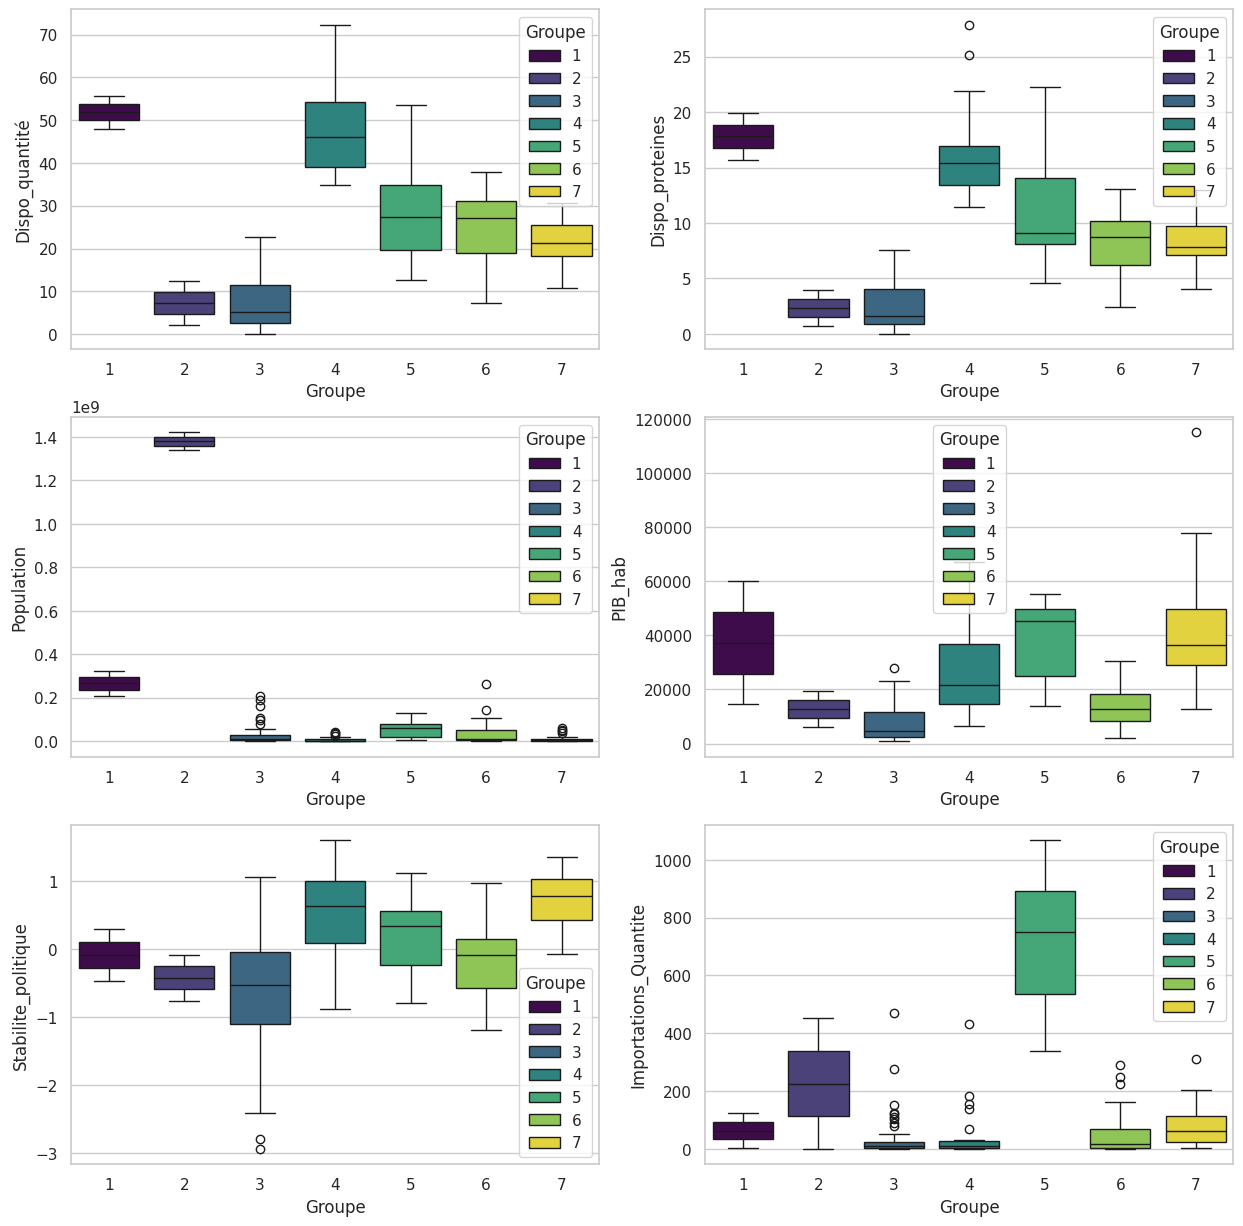

In [ ]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(15, 15))
sns.set(style="whitegrid")

plt.subplot(321)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Dispo_quantité', hue='Groupe', palette='viridis')

plt.subplot(322)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Dispo_proteines', hue='Groupe', palette='viridis')

plt.subplot(323)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Population', hue='Groupe', palette='viridis')

plt.subplot(324)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='PIB_hab', hue='Groupe', palette='viridis')

plt.subplot(325)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Stabilite_politique', hue='Groupe', palette='viridis')

plt.subplot(326)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Importations_Quantite', hue='Groupe', palette='viridis')

plt.savefig("boxplot_dendogramme.png")
plt.show(block=False)

## Analyse des boxplot

* Disponibilité alimentaire (Kcal/personne/jour) et Disponibilité de protéines en quantité (g/personne/jour) : Le groupe 1 et 4 ont le meilleur accès à la viande et aux calories.
* Les groupes 1, 5 et 7 ont le PIB_hab le plus élevé.
* Les groupes 4, 5 et 7 comportent les pays les plus stables politiquement et seraient donc plus propice au commerce.
* Le groupe 5 est le groupe qui importe significativement plus de viande poulet.

Nous allons nous intéresser au groupe 5. Il dispose d'un PIB par habitant parmi les plus élevés, est parmi les plus stables politiquement et est le plus grand importateur de viande de poulet.
Nous observerons plus précisément la consommation et l'importation de viande de poulet.

In [ ]:
# Affichage des pays qui compose le groupe 5

print(df_groupe5_cah['Zone'].unique())

['Afrique du Sud' 'Allemagne' 'Arabie saoudite' 'Belgique'
 'Chine - RAS de Hong-Kong' 'France' 'Japon' 'Mexique' 'Pays-Bas'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


Il y a seulement 11 pays dans ce groupe.

# Classification - Kmeans

L'objectif va être de minimiser l'innertie intraclasse. C'est à dire minimiser la dispersion entre chaque classe. Une classe (ou cluster) est une sorte de nuage de points représentant des individus et centré autour d'un "individu moyen", le centroïde. Ce centroïde correspondant à la moyenne des caractéristiques de ce "nuage", c'est pourquoi il est fortement affecté par les outliers.

**Inconvénient** : le Kmeans n'est pas capable de déterminer lui-même le nombre de classes nécessaires. On fera donc varier k (k étant le nombre de classe qu'on souhaite voir apparaître).

A chaque fois que nous ferons varier K, nous aurons une inertie intra-classe différente. Avec le résultat de chacun des inerties, nous allons pouvoir dessiner un graphique. Le graphique représentera ainsi une ligne en "coude". Ce coude représente le moment où l'augmentation de nombre de cluster a un plus faible impact. C'est en ce point que le nombre de cluster est optimal.

**Avantage** : L'algorithme des Kmeans permettra toujours un partitionnement. C'est à dire qu'il permettra toujours de répartir nos lignes de données en différents groupes.

**IMPORTANT** : il faut faire attention à un point. Avec notre échantillon, il y aura toujours (pour un nombre de clusters donné) une partition qui donnera une inertie intraclasse minimale, mais le k-means ne la trouvera pas toujours. En effet, cela dépend de l'initialisation des centroïdes : comme on les place aléatoirement, le résultat donné peut être différent quand on relance l'algorithme. Il est donc conseillé de relancer plusieurs fois l'algorithme pour sélectionner la partition dont l’inertie intraclasse sera la plus petite.

Nous devons donc :

1) Placer aléatoirement les premiers centroïdes

2) Effectuer plusieurs itérations de kmeans  jusqu'à ce que les centroïdes be bougent plus.

3) A partir des inerties des centroïdes de chaque itération, réaliser un grapphique linéaire.

4) Interpréter le graphique en coude

Le coude sur le graphique représente le point optimal de nombre de cluster. On peut voir un coude car l'augmentation du nombre de cluster a un impact moins significatif sur la diminution de l"inertie intra-classe. En effetn plus il y a de clusters, plus le nombre d'individus par cluster diminue, et plus les clusters sont resserrés. Donc, bien entendu, l’inertie intraclasse diminue forcément quand K augmente !

## Méthode du coude

In [ ]:
# On défini d'abord une liste vide pour stocker nos inerties

intertia = []

#On défini ensuite la liste du nombre de clusters que l'on veut tester

k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
# Pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie

for i in k_list :
  kmeans = KMeans(n_clusters=i, n_init=10)
  kmeans.fit(df_std)
  intertia.append(kmeans.inertia_)

In [ ]:
# Liste des inerties

intertia

[2379.999999999999,
 1829.9692031619804,
 1322.566284652613,
 1107.0285291203497,
 911.4309548159199,
 796.2242428809643,
 715.1244272772873,
 640.1142702435654,
 598.0254193810081]

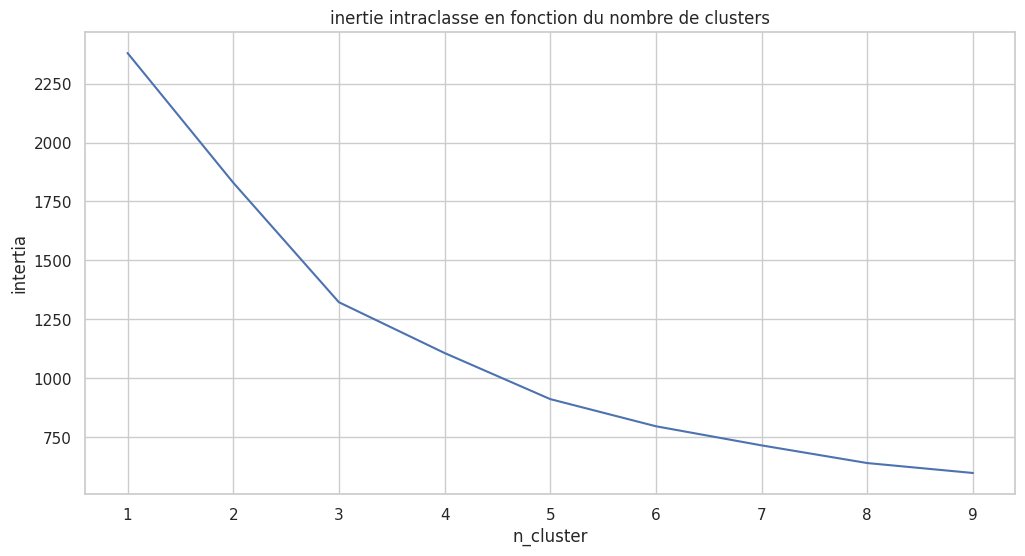

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_title("inertie intraclasse en fonction du nombre de clusters")
ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

C'est jusqu'au 5ème cluster que l'inertie diminue significativement. 5 clusters semblent être suffisant et correspond au nombre de cluster définit dans la classification ascendante hiérarchique (CAH).

In [ ]:
# Nous devons d'abord ré-entrainer un estimateur !

kmeans = KMeans(n_clusters=5)
kmeans.fit(df_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
# Voici les clusters :

kmeans.labels_


array([0, 1, 3, 0, 3, 0, 1, 3, 1, 0, 1, 3, 0, 1, 0, 1, 3, 1, 1, 0, 0, 2,
       3, 0, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 4, 3, 1, 0, 3, 3, 3, 0, 3, 0,
       1, 0, 3, 3, 0, 1, 3, 3, 3, 3, 0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 3,
       4, 0, 0, 0, 3, 3, 1, 3, 1, 3, 3, 3, 0, 0, 0, 1, 0, 3, 0, 0, 3, 3,
       0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 1,
       0, 3, 0, 0, 1, 0, 3, 0, 3, 1, 3, 0, 3, 3, 0, 0, 3, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 3, 3, 0, 0, 3, 1, 3, 0, 0, 0, 3, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0], dtype=int32)

In [ ]:
# Pour être plus clair, nous allons utiliser des lettres plutôt que des nombres

dd = {i:j for i,j in enumerate(list("abcde"))}
dd

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e'}

In [ ]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['a', 'b', 'd', 'a', 'd', 'a', 'b', 'd', 'b', 'a']

In [ ]:
# Affichage des pays selon leurs cluster

df_pays_cluster = pd.DataFrame(data.index, labels).reset_index()
df_pays_cluster = df_pays_cluster.rename(columns={'index':'cluster'})
df_pays_cluster

,cluster,Zone
0,a,Afghanistan
1,b,Afrique du Sud
2,d,Albanie
3,a,Algérie
4,d,Allemagne
...,...,...
165,d,Émirats arabes unis
166,a,Équateur
167,c,États-Unis d'Amérique
168,a,Éthiopie


In [ ]:
data.columns.tolist()

['Dispo_calories',
 'Dispo_quantité',
 'Dispo_mat_grasse',
 'Dispo_proteines',
 'Disponibilité intérieure',
 'Exportations_Quantite',
 'Importations_Quantite',
 'Production',
 "Taux d'importation",
 'PIB_hab',
 'Stabilite_politique',
 'dist',
 'Valeur',
 'Population']

In [ ]:
# Création d'un dataframe contenant les données dont nous n'avons pas besoin pour le moment. Nous pourrons ainsi les récupérer plus tard si besoin sans impacter les performances inutilement.
# Simplification du dataframe principal

data_addon = data.drop(columns=['Dispo_calories',
 'Dispo_proteines',
 'Importations_Quantite',
 'Production',
 'Taux d\'importation',
 'PIB_hab',
 'Stabilite_politique',
 'Population'])


data_simplify = data.drop(columns=['Dispo_quantité',
 'Dispo_mat_grasse',
 'Disponibilité intérieure',
 'Exportations_Quantite',
 'dist',
 'Valeur'])

In [ ]:
# Données secondaires réutilisables ultérieurement

data_addon

,Dispo_quantité,Dispo_mat_grasse,Disponibilité intérieure,Exportations_Quantite,dist,Valeur
Zone,,,,,,
Afghanistan,1.53,0.33,57.0,0.0,5590.3810,36296.113
Afrique du Sud,35.69,9.25,2118.0,63.0,9353.5520,57009.756
Albanie,16.36,6.45,47.0,0.0,1603.5340,2884.169
Algérie,6.38,1.50,277.0,0.0,1340.3900,41389.189
Allemagne,19.47,4.16,1739.0,646.0,439.8984,82658.409
...,...,...,...,...,...,...
Émirats arabes unis,43.47,9.25,412.0,94.0,5249.5350,9487.203
Équateur,19.31,6.35,341.0,0.0,9367.0980,16785.361
États-Unis d'Amérique,55.68,14.83,18266.0,3692.0,5838.1570,325084.756


In [ ]:
# Données principales sans superflux

data_simplify

,Dispo_calories,Dispo_proteines,Importations_Quantite,Production,Taux d'importation,PIB_hab,Stabilite_politique,Population
Zone,,,,,,,,
Afghanistan,5.0,0.54,29.0,28.0,0.508772,2058.4,-2.80,36296113
Afrique du Sud,143.0,14.11,514.0,1667.0,0.242682,13860.3,-0.28,57009756
Albanie,85.0,6.26,38.0,13.0,0.808511,12771.0,0.38,2884169
Algérie,22.0,1.97,2.0,275.0,0.007220,11737.4,-0.92,41389189
Allemagne,71.0,7.96,842.0,1514.0,0.484186,53071.5,0.59,82658409
...,...,...,...,...,...,...,...,...
Émirats arabes unis,147.0,14.80,433.0,48.0,1.050971,67183.6,0.62,9487203
Équateur,83.0,6.15,0.0,340.0,0.000000,11617.9,-0.07,16785361
États-Unis d'Amérique,219.0,19.93,123.0,21914.0,0.006734,59914.8,0.29,325084756


In [ ]:
# Intégration des groupes dans nos données de départ représenté par le dataframe "data"
# Jointure interne nécessaire pour parvenir à agréger nos données

df_cluster_km = pd.merge(data_simplify, df_pays_cluster, on='Zone')
df_cluster_km

,Zone,Dispo_calories,Dispo_proteines,Importations_Quantite,Production,Taux d'importation,PIB_hab,Stabilite_politique,Population,cluster
0,Afghanistan,5.0,0.54,29.0,28.0,0.508772,2058.4,-2.80,36296113,a
1,Afrique du Sud,143.0,14.11,514.0,1667.0,0.242682,13860.3,-0.28,57009756,b
2,Albanie,85.0,6.26,38.0,13.0,0.808511,12771.0,0.38,2884169,d
3,Algérie,22.0,1.97,2.0,275.0,0.007220,11737.4,-0.92,41389189,a
4,Allemagne,71.0,7.96,842.0,1514.0,0.484186,53071.5,0.59,82658409,d
...,...,...,...,...,...,...,...,...,...,...
165,Émirats arabes unis,147.0,14.80,433.0,48.0,1.050971,67183.6,0.62,9487203,d
166,Équateur,83.0,6.15,0.0,340.0,0.000000,11617.9,-0.07,16785361,a
167,États-Unis d'Amérique,219.0,19.93,123.0,21914.0,0.006734,59914.8,0.29,325084756,c
168,Éthiopie,0.0,0.04,1.0,14.0,0.071429,2021.6,-1.68,106399924,a


In [ ]:
# Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse

df_cluster_km.loc[:, ~df_cluster_km.columns.isin(['Zone'])].groupby('cluster').mean()

,Dispo_calories,Dispo_proteines,Importations_Quantite,Production,Taux d'importation,PIB_hab,Stabilite_politique,Population
cluster,,,,,,,,
a,31.848837,3.105930,34.755814,248.953488,0.416414,7839.715589,-0.589651,2.975595e+07
b,163.571429,14.606286,71.457143,433.685714,0.502790,21691.669554,0.343406,1.139299e+07
c,211.500000,17.805000,63.000000,18057.500000,0.003517,37219.700000,-0.090000,2.664593e+08
d,84.977778,8.933111,203.377778,607.711111,0.542784,39966.972153,0.557111,2.398856e+07
e,33.000000,2.355000,226.000000,10890.500000,0.012444,12891.923438,-0.423079,1.379849e+09


In [ ]:
# Le nombre de pays par cluster


df_cluster_km.groupby('cluster')['Zone'].count()

cluster
a    86
b    35
c     2
d    45
e     2
Name: Zone, dtype: int64

On remarque 2 clusters qui contiennent seulement 2 pays.

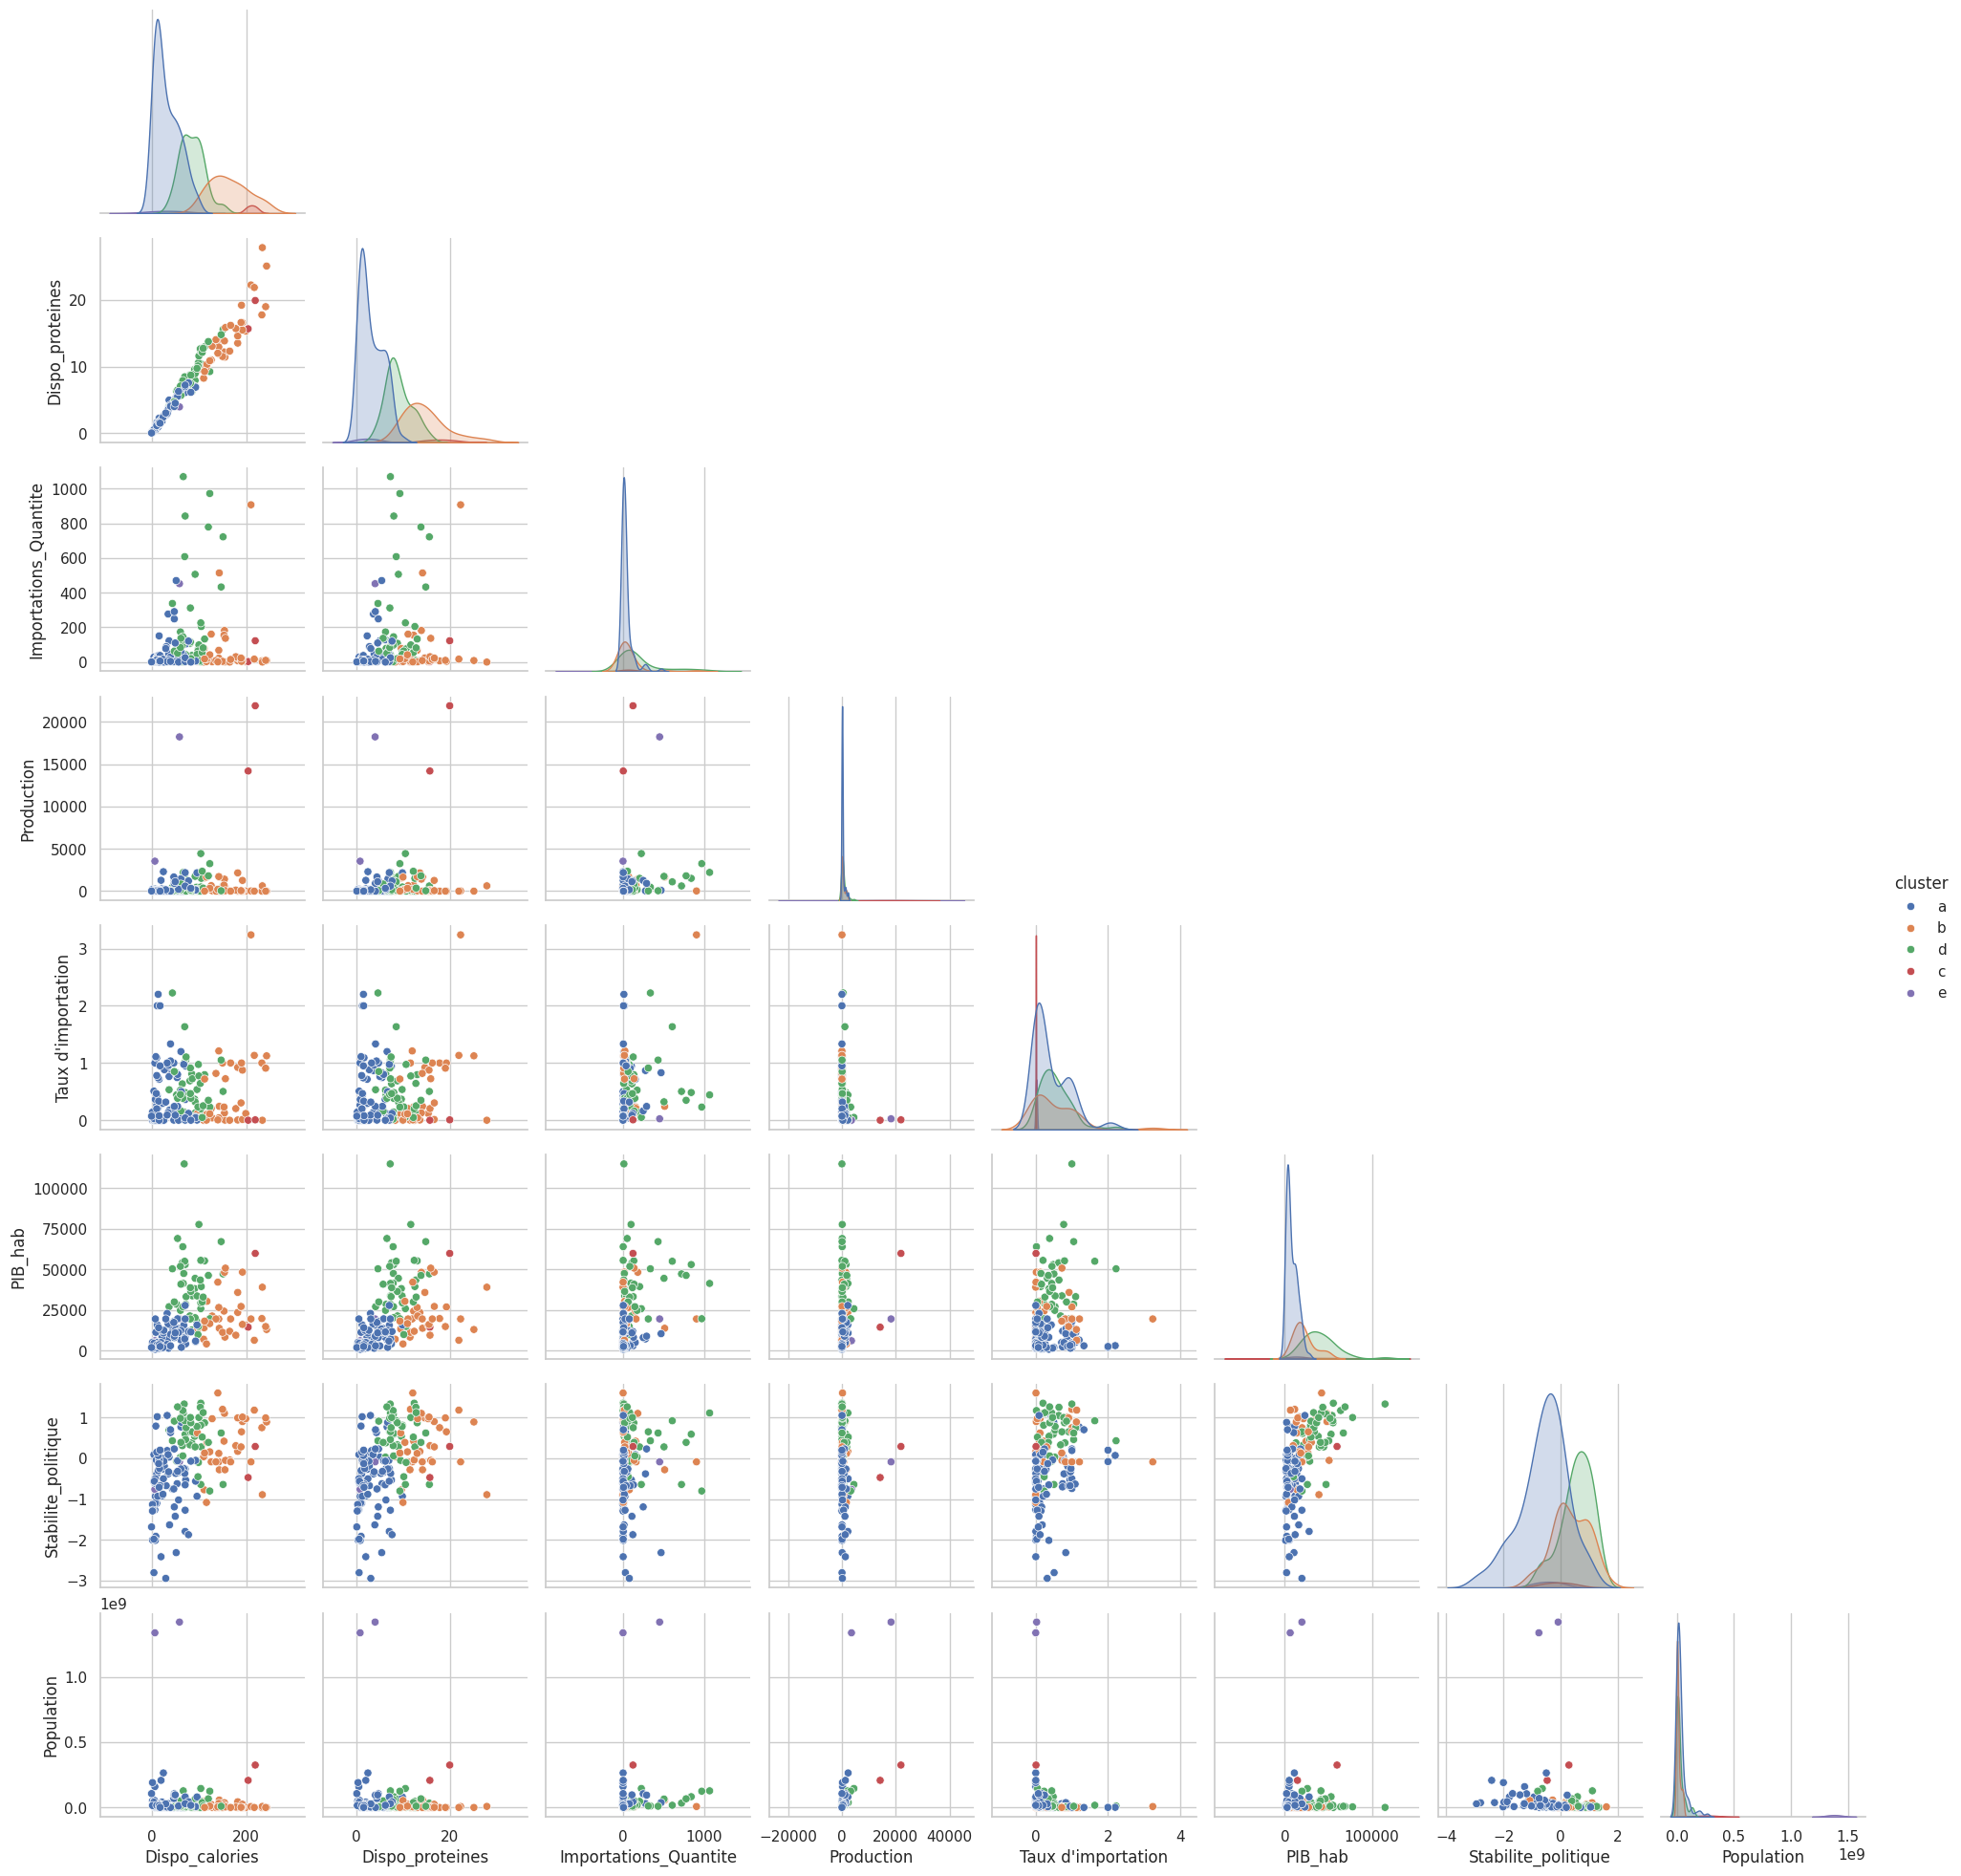

In [ ]:
# Affichage graphique

sns.pairplot(df_cluster_km, hue="cluster", corner=True)

Les cluster e et d sont parmis les plus grands importateurs de poulet par rapport à leurs PIB par habitant. Ces clusters sont donc de grands consommateurs de poulets et sont des pays relativement riches. Note : le cluster d ne comprend que 2 pays.

In [ ]:
# Les données ne suivant pas une distribution normale, nous utilisons le test de spearman pour vérifier la corrélation des variables entre elles.

import numpy as np
from scipy.stats import spearmanr

#['Dispo_calories','Dispo_quantité', 'Dispo_mat_grasse', 'Dispo_proteines', 'Disponibilité intérieure', 'Exportations_Quantite', 'Importations_Quantite', 'Production', "Taux d'importation", 'PIB_hab', 'Stabilite_politique', 'dist', 'Valeur', 'Population']

# Calcul du coefficient de corrélation de Spearman et de la valeur p
rho, p_value = spearmanr(data['Dispo_proteines'], data['Dispo_calories'])

# Affichage des résultats
print(f"Coefficient de corrélation de Spearman : {rho:.4f}")
print(f"Valeur p : {p_value:.4f}")

# Interprétation des résultats
if p_value < 0.05:
    print("Il y a une corrélation statistiquement significative.")
else:
    print("Aucune corrélation statistiquement significative.")

Coefficient de corrélation de Spearman : 0.9836
Valeur p : 0.0000
Il y a une corrélation statistiquement significative.


In [ ]:
# Calcul du coefficient de corrélation de Spearman et de la valeur p
rho, p_value = spearmanr(data['Dispo_proteines'], data['Dispo_quantité'])

# Affichage des résultats
print(f"Coefficient de corrélation de Spearman : {rho:.4f}")
print(f"Valeur p : {p_value:.4f}")

# Interprétation des résultats
if p_value < 0.05:
    print("Il y a une corrélation statistiquement significative.")
else:
    print("Aucune corrélation statistiquement significative.")

Coefficient de corrélation de Spearman : 0.9886
Valeur p : 0.0000
Il y a une corrélation statistiquement significative.


In [ ]:
# Calcul du coefficient de corrélation de Spearman et de la valeur p
rho, p_value = spearmanr(data['Dispo_proteines'], data['Dispo_mat_grasse'])

# Affichage des résultats
print(f"Coefficient de corrélation de Spearman : {rho:.4f}")
print(f"Valeur p : {p_value:.4f}")

# Interprétation des résultats
if p_value < 0.05:
    print("Il y a une corrélation statistiquement significative.")
else:
    print("Aucune corrélation statistiquement significative.")

Coefficient de corrélation de Spearman : 0.9601
Valeur p : 0.0000
Il y a une corrélation statistiquement significative.


In [ ]:
# Calcul du coefficient de corrélation de Spearman et de la valeur p
rho, p_value = spearmanr(data['Dispo_proteines'], data['Dispo_proteines'])

# Affichage des résultats
print(f"Coefficient de corrélation de Spearman : {rho:.4f}")
print(f"Valeur p : {p_value:.4f}")

# Interprétation des résultats
if p_value < 0.05:
    print("Il y a une corrélation statistiquement significative.")
else:
    print("Aucune corrélation statistiquement significative.")

Coefficient de corrélation de Spearman : 1.0000
Valeur p : 0.0000
Il y a une corrélation statistiquement significative.


In [ ]:
# Calcul du coefficient de corrélation de Spearman et de la valeur p
rho, p_value = spearmanr(data['Dispo_proteines'], data['Disponibilité intérieure'])

# Affichage des résultats
print(f"Coefficient de corrélation de Spearman : {rho:.4f}")
print(f"Valeur p : {p_value:.4f}")

# Interprétation des résultats
if p_value < 0.05:
    print("Il y a une corrélation statistiquement significative.")
else:
    print("Aucune corrélation statistiquement significative.")

Coefficient de corrélation de Spearman : 0.2678
Valeur p : 0.0004
Il y a une corrélation statistiquement significative.


In [ ]:
# Calcul du coefficient de corrélation de Spearman et de la valeur p
rho, p_value = spearmanr(data['Dispo_proteines'], data['Exportations_Quantite'])

# Affichage des résultats
print(f"Coefficient de corrélation de Spearman : {rho:.4f}")
print(f"Valeur p : {p_value:.4f}")

# Interprétation des résultats
if p_value < 0.05:
    print("Il y a une corrélation statistiquement significative.")
else:
    print("Aucune corrélation statistiquement significative.")

Coefficient de corrélation de Spearman : 0.4328
Valeur p : 0.0000
Il y a une corrélation statistiquement significative.


In [ ]:
# Calcul du coefficient de corrélation de Spearman et de la valeur p
rho, p_value = spearmanr(data['Dispo_proteines'], data['Importations_Quantite'])

# Affichage des résultats
print(f"Coefficient de corrélation de Spearman : {rho:.4f}")
print(f"Valeur p : {p_value:.4f}")

# Interprétation des résultats
if p_value < 0.05:
    print("Il y a une corrélation statistiquement significative.")
else:
    print("Aucune corrélation statistiquement significative.")

Coefficient de corrélation de Spearman : 0.3694
Valeur p : 0.0000
Il y a une corrélation statistiquement significative.


In [ ]:
# Calcul du coefficient de corrélation de Spearman et de la valeur p
rho, p_value = spearmanr(data['Dispo_proteines'], data['Production'])

# Affichage des résultats
print(f"Coefficient de corrélation de Spearman : {rho:.4f}")
print(f"Valeur p : {p_value:.4f}")

# Interprétation des résultats
if p_value < 0.05:
    print("Il y a une corrélation statistiquement significative.")
else:
    print("Aucune corrélation statistiquement significative.")

Coefficient de corrélation de Spearman : 0.1970
Valeur p : 0.0100
Il y a une corrélation statistiquement significative.


In [ ]:
# Calcul du coefficient de corrélation de Spearman et de la valeur p
rho, p_value = spearmanr(data['Dispo_proteines'], data['Taux d\'importation'])

# Affichage des résultats
print(f"Coefficient de corrélation de Spearman : {rho:.4f}")
print(f"Valeur p : {p_value:.4f}")

# Interprétation des résultats
if p_value < 0.05:
    print("Il y a une corrélation statistiquement significative.")
else:
    print("Aucune corrélation statistiquement significative.")

Coefficient de corrélation de Spearman : 0.1588
Valeur p : 0.0387
Il y a une corrélation statistiquement significative.


In [ ]:
# Calcul du coefficient de corrélation de Spearman et de la valeur p
rho, p_value = spearmanr(data['Dispo_proteines'], data['PIB_hab'])

# Affichage des résultats
print(f"Coefficient de corrélation de Spearman : {rho:.4f}")
print(f"Valeur p : {p_value:.4f}")

# Interprétation des résultats
if p_value < 0.05:
    print("Il y a une corrélation statistiquement significative.")
else:
    print("Aucune corrélation statistiquement significative.")

Coefficient de corrélation de Spearman : 0.6783
Valeur p : 0.0000
Il y a une corrélation statistiquement significative.


In [ ]:
# Calcul du coefficient de corrélation de Spearman et de la valeur p
rho, p_value = spearmanr(data['Dispo_proteines'], data['Stabilite_politique'])

# Affichage des résultats
print(f"Coefficient de corrélation de Spearman : {rho:.4f}")
print(f"Valeur p : {p_value:.4f}")

# Interprétation des résultats
if p_value < 0.05:
    print("Il y a une corrélation statistiquement significative.")
else:
    print("Aucune corrélation statistiquement significative.")

Coefficient de corrélation de Spearman : 0.5049
Valeur p : 0.0000
Il y a une corrélation statistiquement significative.


In [ ]:
# Calcul du coefficient de corrélation de Spearman et de la valeur p
rho, p_value = spearmanr(data['Dispo_proteines'], data['dist'])

# Affichage des résultats
print(f"Coefficient de corrélation de Spearman : {rho:.4f}")
print(f"Valeur p : {p_value:.4f}")

# Interprétation des résultats
if p_value < 0.05:
    print("Il y a une corrélation statistiquement significative.")
else:
    print("Aucune corrélation statistiquement significative.")

Coefficient de corrélation de Spearman : 0.0311
Valeur p : 0.6870
Aucune corrélation statistiquement significative.


In [ ]:
# Calcul du coefficient de corrélation de Spearman et de la valeur p
rho, p_value = spearmanr(data['Dispo_proteines'], data['Valeur'])

# Affichage des résultats
print(f"Coefficient de corrélation de Spearman : {rho:.4f}")
print(f"Valeur p : {p_value:.4f}")

# Interprétation des résultats
if p_value < 0.05:
    print("Il y a une corrélation statistiquement significative.")
else:
    print("Aucune corrélation statistiquement significative.")

Coefficient de corrélation de Spearman : -0.2457
Valeur p : 0.0012
Il y a une corrélation statistiquement significative.


In [ ]:
# Calcul du coefficient de corrélation de Spearman et de la valeur p
rho, p_value = spearmanr(data['Dispo_proteines'], data['Population'])

# Affichage des résultats
print(f"Coefficient de corrélation de Spearman : {rho:.4f}")
print(f"Valeur p : {p_value:.4f}")

# Interprétation des résultats
if p_value < 0.05:
    print("Il y a une corrélation statistiquement significative.")
else:
    print("Aucune corrélation statistiquement significative.")

Coefficient de corrélation de Spearman : -0.2457
Valeur p : 0.0012
Il y a une corrélation statistiquement significative.


## Matrice de corrélation

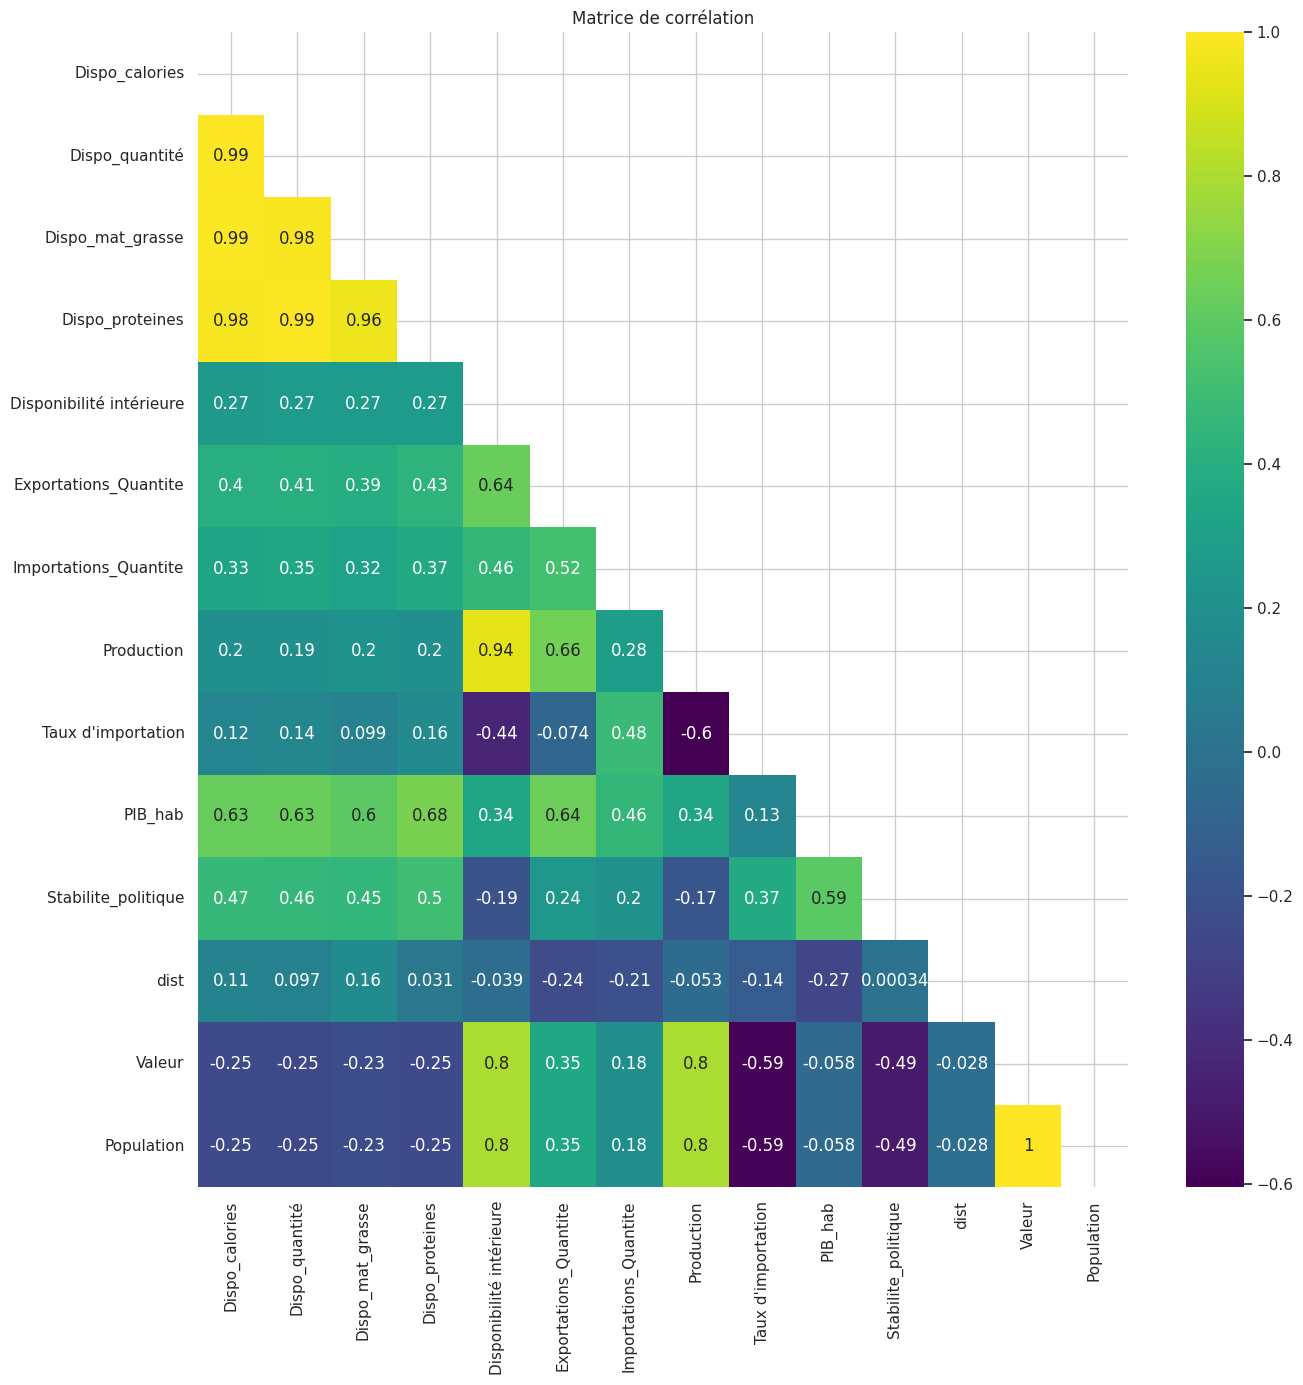

In [ ]:
# Rappel : Nous avions constatés que les données ne suivaient pas une distribution normale, par conséquent nous avions conclu de l'utilisation du test de spearman à la place du test de pearson dans la matrice de corrélation.

# Nous vérifions la corrélation variables entre elles.

# Matrice de corrélation
matrice_correlation = data.corr(method='spearman')
# On ajoute cette variable pour afficher uniquement le triangle inférieur de la heatmap (et éviter d'afficher les doublons de valeurs)
matrix = np.triu(matrice_correlation)
# Visualisation de la matrice avec une heatmap
plt.figure(figsize=(15,15))
sns.heatmap(matrice_correlation, cmap = 'viridis', annot=True, mask=matrix)
plt.title('Matrice de corrélation')
plt.show()

On supprime les variables suivantes qui sont trop corrélées entre elles:

* On supprime production qui est trop corrélé à exportation-quantité. On va garder la variable la moins corrélée des deux.
* On supprime la colonne valeur qui est trop corrélée à population.

## Réduction du nombre de variables représentées pour faciliter la lecture de notre ACP sur le cercle des corrélations.

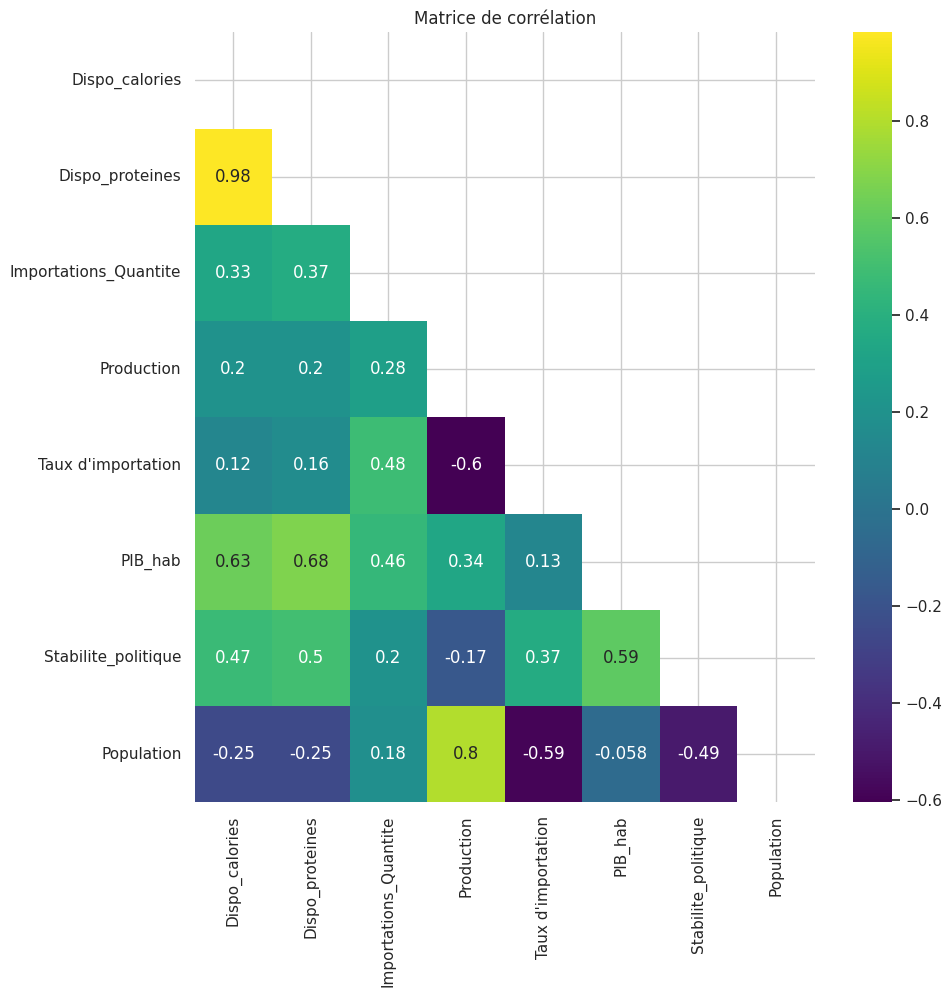

In [ ]:
# Nous avons choisi de choisir un dataframe contenant moins de variables et procédons de nouveaux au test de corrélation

# Nous vérifions les colonnes restantes corrélées entre elles.

# Matrice de corrélation
matrice_correlation = data_simplify.corr(method='spearman')
# On ajoute cette variable pour afficher uniquement le triangle inférieur de la heatmap (et éviter d'afficher les doublons de valeurs)
matrix = np.triu(matrice_correlation)
# Visualisation de la matrice avec une heatmap
plt.figure(figsize=(10,10))
sns.heatmap(matrice_correlation, cmap = 'viridis', annot=True, mask=matrix)

plt.title('Matrice de corrélation')
plt.show()

In [ ]:
#Supression de la colonne production qui subsiste dans les données data_simplify. Les données valeurs n'y étant pas présentent.
data_simplify.drop(columns=[['Production', ['Dispo_calories']], inplace=True)

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-256-07ba5ae0d728>, line 2)

### Normalisation des données : On normalise les données afin d'avoir une analyse la plus fidèle possible, en étant sur la même échelle.

In [ ]:
#Transformation en array Numpy
#Indexation selon les pays par la fonction .set_index()

X = data_simplify.values
X.shape

In [ ]:
from sklearn import preprocessing

# Centrage / réduction des données pour que nos données soit à la même échelle !

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)


In [ ]:
df_std_acp_reduct = pd.DataFrame(X_scaled, columns=data_simplify.columns)
df_std_acp_reduct

# ACP

In [ ]:
# Nous allons travailler que sur les X premières composantes :
n_components = 7
# On instancie notre ACP :
pca = PCA(n_components=n_components)
# On l'entraine sur les données scalées :
pca.fit(X_scaled)

## Explained variance & scree plot

Intéressons nous maintenant à la variance captée par chaque nouvelle composante. Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_ :

In [ ]:
#pca.explained_variance_ratio_

scree = (pca.explained_variance_ratio_*100).round(2)
scree


Ici la 1ère composante capte 39,9% de la variance de nos données initiales, la 2ème 17,12% etc etc.

In [ ]:
# On calcule la somme cumulée du explained_variance_ratio pour afficher son évolution graphique. nous allons utiliser numpy et sa fonction cumsum.
scree_cum = scree.cumsum().round()
scree_cum


In [ ]:
x_list = range(1, n_components+1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que nous sommes à environ 60% de variance avec 2 composantes, que près de 85% de la variance est comprise dans les 4 premières composantes, et près de 95% dans les 5 premières.

Les 5 premières composantes principales représentent très bien nos données avec plus de 90% d'inertie, mais modéliser des données au delà de la 3D étant complexe à modéliser, nous projeterons nos données dans un plan 2D via l'ACP et son graphique de corrélation. (car il existe autant de dimensions que de variables dans un graphique de corrélation, qui représente une hypersphère mais en 2D)

### Components

Intéressons nous maintenant à nos fameuses composantes. Nous avons dit dans le cours que c'est bien par un calcul que l'on obtient ces composantes.

La formule de ce calcul nous est donnée par l'attribut components_. Cette variable est généralement nommée pcs :

In [ ]:
pcs = pca.components_
pcs

Affichons la même chose mais version pandas :

In [ ]:
pcs = pd.DataFrame(pcs)
test = pd.DataFrame(pcs)
pcs

In [ ]:
features = data_simplify.columns
pcs.columns = features
pcs.index = [f"PC{i}" for i in x_list]
pcs.round(2)


In [ ]:
pcs.T

In [ ]:
def correlation_graph(pca,
                      x_y,
                      features) :
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.07,
                head_length=0.07,
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('PC{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('PC{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # On ajoute le titre
    plt.title("Cercle des corrélations (PC{} et PC{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap = 'crest', fmt="0.2f")

In [ ]:
# Cercle de corrélation des 2 premières composantes

correlation_graph(pca, (0,1), features)

* Les variables les mieux représentées sont :

* Les variables les moins bien représentées sont :

* Quelles variables sont corrélées  ?

In [ ]:
correlation_graph(pca, (2,3), features)

In [ ]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

In [ ]:
# Création d'un DataFrame à l'aide des composantes principales
# Ajout du nom du pays ainsi que le groupe et le cluster associé par les méthodes précédentes (Dendrogramme & K-Means)

df_acp = pd.DataFrame(X_proj)
df_acp.columns = pcs.index
df_acp['Zone'] = data.index
#test.set_index('pays', inplace=True)
df_acp_cluster = pd.merge(df_acp, df_pays_cluster, on='Zone')
df_acp_cluster = pd.merge(df_acp_cluster, df_pays_groupe, on='Zone')
df_acp_cluster

In [ ]:
df_acp_cluster

In [ ]:
# Préparation des données en vue de la création du DataFrame de centroides des groupes ar le dendrogramme

df_acp_cluster.drop(columns=['Zone', 'cluster'])
# On ne sélectionne que les données numériques car des données textes sont présentes dans les lignes numériques.
numerical_columns_dendogramme = df_acp_cluster.select_dtypes(include=['number'])
numerical_columns_dendogramme['Groupe'] = df_acp_cluster['Groupe']



In [ ]:
# On calcule la moyenne des groupes
df_centroide_groupe = numerical_columns_dendogramme.groupby('Groupe').mean()
df_centroide_groupe

In [ ]:
# Création du DataFrame de centroides des groupes crée par le dendrogramme

# On Ajoute une colonne 'Zone_centroide' avec la valeur "centroide"
df_centroide_groupe['Zone_centroide'] = "centroide"
# On ajoute une colonne 'Groupe' avec la valeur "centroide"
df_centroide_groupe['Groupe'] = "centroide"
df_centroide_groupe


In [ ]:
# Préparation des données en vue de la création du DataFrame de centroides des groupes par les kmeans

df_acp_cluster.drop(columns=['Zone', 'Groupe'])
# On ne sélectionne que les données numériques car des données textes sont présentes dans les lignes numériques.
numerical_columns_kmeans = df_acp_cluster.select_dtypes(include=['number'])
numerical_columns_kmeans['cluster'] = df_acp_cluster['cluster']

In [ ]:
numerical_columns_kmeans

In [ ]:
# Création du DataFrame de centroides des groupes crée par K-Means

df_centroide_cluster = numerical_columns_kmeans.groupby('cluster').mean()
df_centroide_cluster['pays_centroide'] = "centroide"
df_centroide_cluster['cluster'] = "centroide"
df_centroide_cluster = df_centroide_cluster.drop('Groupe', axis = 1)
df_centroide_cluster

In [ ]:
df_centroide_cluster

In [ ]:
# Ajout des centroides de groupe dans le DataFrame des composantes principales

df_cah_groupe = df_acp_cluster.drop('cluster', axis=1)
df_cah_groupe = pd.concat([df_cah_groupe, df_centroide_groupe])
df_cah_groupe

In [ ]:
# Ajout des centroides de cluster dans le DataFrame des composantes principales

df_km_cluster = df_acp_cluster.drop('Groupe', axis=1)
df_km_cluster = pd.concat([df_km_cluster, df_centroide_cluster])
df_km_cluster

In [ ]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette = 'Paired')

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x+1} {v1}')
    ax.set_ylabel(f'PC{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur PC{x+1} et PC{y+1})")
    plt.show()

In [ ]:
# Affichage du clustering crée par le dendrogramme

x_y = [0,1]
display_factorial_planes(df_cah_groupe, x_y, pca, figsize=(20,16), clusters=df_cah_groupe.Groupe, marker="o")
#, labels = data.index


In [ ]:
# Affichage du clustering crée par K-Means

x_y = [0,1]
display_factorial_planes(df_km_cluster, x_y, pca, figsize=(20,16), clusters=df_km_cluster.cluster, marker="o")

Certains points du groupe C et D sont très éloignés de leurs centroïdes. C'est compréhensible pour le cluster D qui ne comprenait que 2 pays pour le calcul des moyennes. Les variations étant par conséquent plus sensibles du fait du faible nombre d'individus.

Les cluster A, B et E sont assez bien centrés autour de leurs centroïdes.

Les réssultats entre les 2 méthodes sont très similaires.
Les2 groupes de 2 pays sont bien mis en avant dns les données.

IndexError: index 170 is out of bounds for axis 0 with size 170

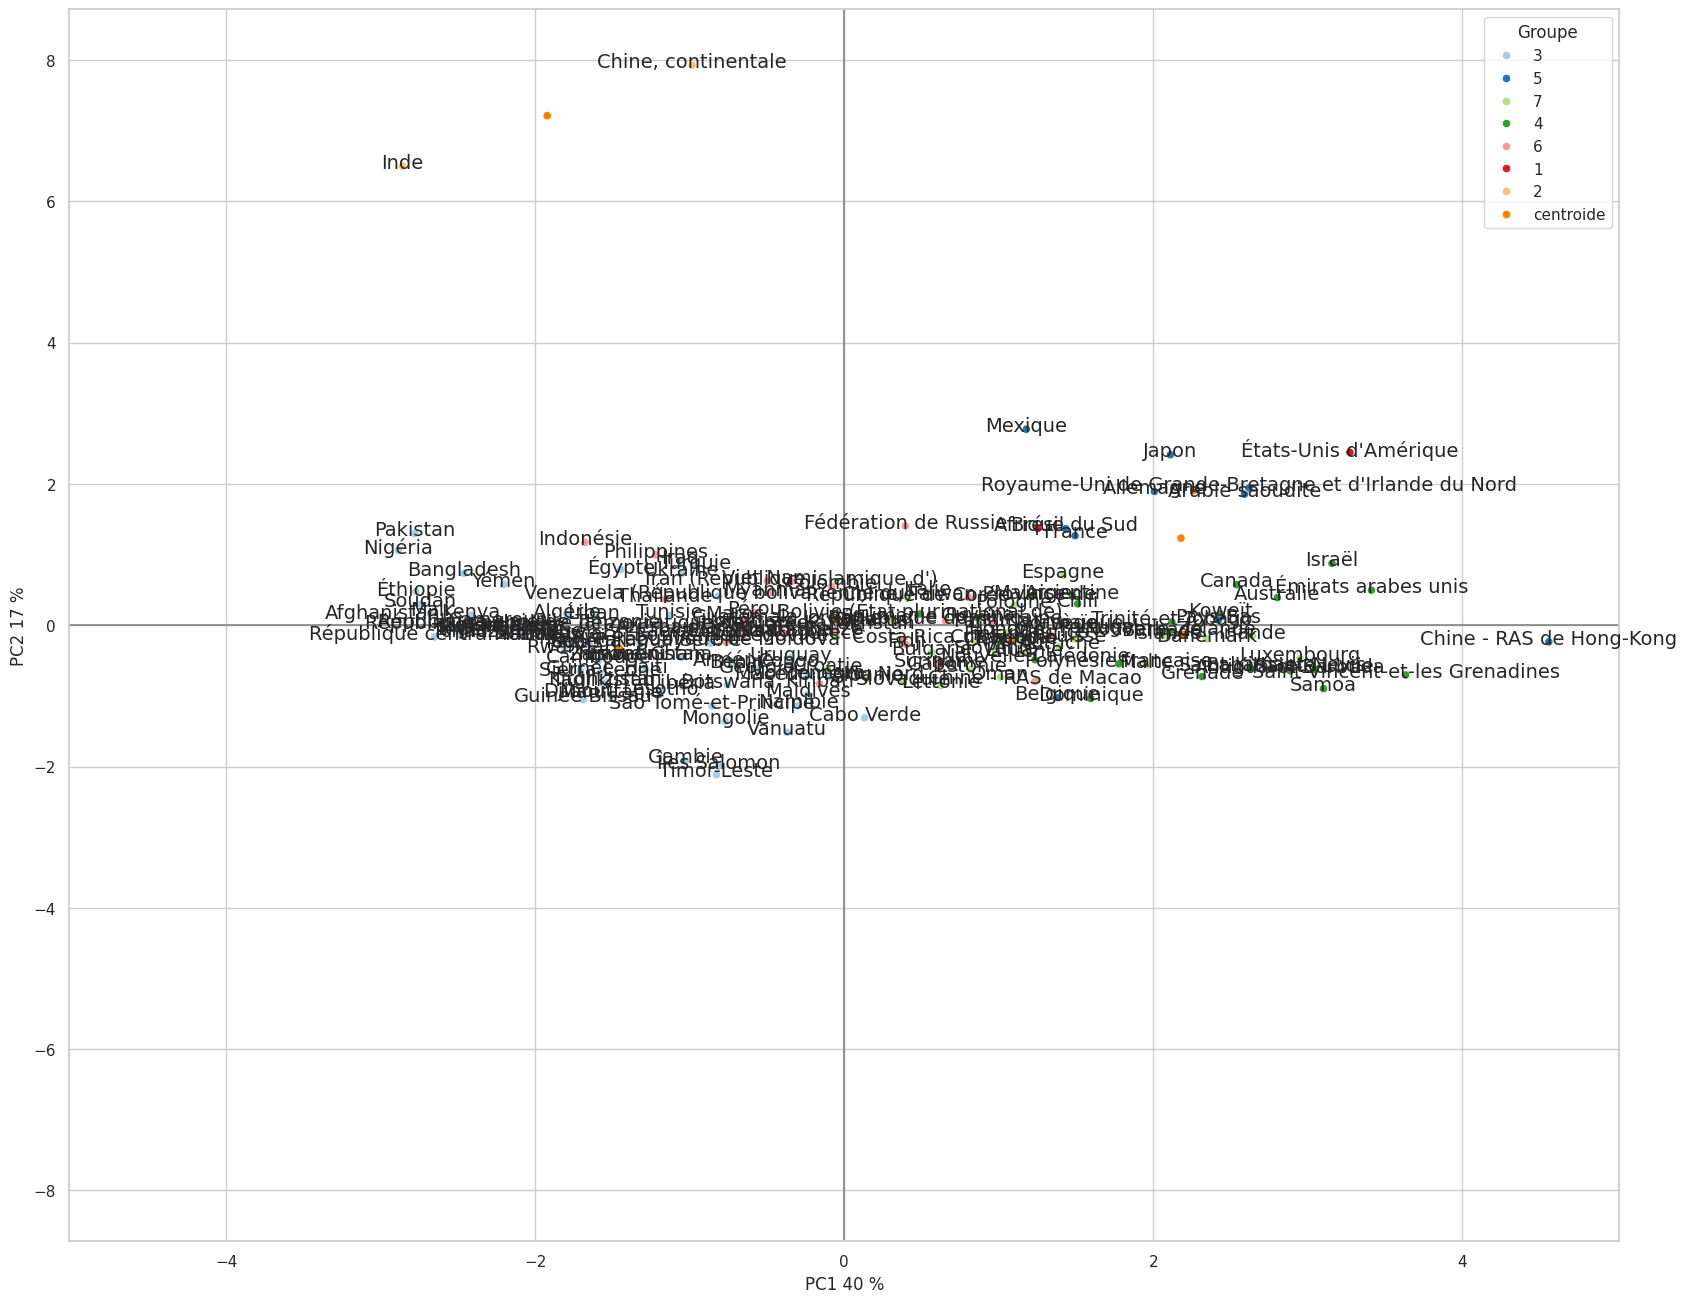

In [ ]:
# Affichage du clustering crée par le dendrogramme + labels

x_y = [0,1]
display_factorial_planes(df_cah_groupe, x_y, pca, figsize=(20,16), clusters=df_cah_groupe.Groupe, marker="o", labels = data.index)

In [ ]:
pcs

### Dans quelles composantes représentent-on le mieux les quantités importés et les disponibilités en protéines ?

In [ ]:
features[6]

In [ ]:
pcs.Importations_Quantite

Les quantités importées sont mieux représentées dans PC3,PC6 ET PC7. Toutefois, les premières composantes comportent le plus de données et sont donc plus fiables. Nous pourrions retenir PC3.

In [ ]:
pca.components_[0, 5]

In [ ]:
pcs.Importations_Quantite

In [ ]:
features[1]

In [ ]:
pcs.Dispo_proteines

Les disponblités en protéines sont mieux représentées dans PC1.

### Pourquoi ne pas retenir PC3 pour la composante importation quantité ?

In [ ]:
x_y = [0,2]
display_factorial_planes(df_km_cluster, x_y, pca, figsize=(20,16), clusters=df_km_cluster.cluster, marker="o", labels = data.index)

Nous remarquons que les données projetées de PC1 et PC3 ne représentent que 34 + 11 % des données, soit 45 %.

### Pourquoi retenir PC1 et PC2 pour les composantes Importation quantité et disponibilité en protéine ?

In [ ]:
# Affichage du clustering crée par K-Means

x_y = [0,1]
display_factorial_planes(df_km_cluster, x_y, pca, figsize=(20,16), clusters=df_km_cluster.cluster, marker="o", labels = data.index)

Avec PC1 ET pc2 les données sont représentées à hauteur de 34 + 26% soit 60%.

Nous remarquons également que le cluster e et c se démarquent des autres pays.

# Comparaison entre les groupes retenus au début du projet et les groupes retenus à la fin.

### Résultats initiaux



CAH - remarques initiales : On remarque que le groupe 1 et le groupe 4 ont le plus accès aux protéines.
Le groupe 2, 3 , 6 et 7 ont un faible accès aux protéines. Ces groupes ont donc un besoin d'accès en protéine.
Le groupe le plus pauvre avec le PIB_hab le plus faible est le groupe 3.
A première vue, les pays les plus susceptibles d'avoir d'être client de l'entreprise se situe dans les groupes 2, 6 et 7.

Suite à l'analyse des boxplots, les résultats suivants avaient été trouvés :

* Disponibilité alimentaire (Kcal/personne/jour) et Disponibilité de protéines en quantité (g/personne/jour) : Le groupe 1 et 4 ont le meilleur accès à la viande et aux calories.
* Les groupes 1, 5 et 7 ont le PIB_hab le plus élevé.
* Les groupes 4, 5 et 7 comportent les pays les plus stables politiquement et seraient donc plus propice au commerce.
* Le groupe 5 est le groupe qui importe significativement plus de viande poulet.

In [ ]:
df_groupes_cah

In [ ]:
df_cah_classement =  df_groupes_cah[['Dispo_proteines', 'Importations_Quantite', 'PIB_hab', 'Groupe']]
df_cah_classement

In [ ]:
# On sélectionne les lignes où la colonne 'Groupe' de la CAH contient les valeurs égales à 2, 6 et 7
df_CAH_selected = df_cah_classement[df_cah_classement['Groupe'].isin([2, 5, 6, 7])]
df_CAH_selected

In [ ]:
df_CAH_selected_sorted = df_CAH_selected.sort_values(by=['Importations_Quantite', 'Dispo_proteines', 'PIB_hab'], ascending=[False, True, False])
df_CAH_selected_sorted.head(10)

#Résultat - Classement des pays ciblés suite à la CAH

In [ ]:
# Nous avons sélectionné les 10 zones à cibler en priorité afin de réaliser les objectifs de vente de viande de poulet de l'entreprise.

df_groupes_cah_sorted = df_groupes_cah.sort_values(by=['Importations_Quantite', 'Dispo_proteines', 'PIB_hab'], ascending=[False, True, False])
df_groupes_cah_sorted.head(10)

In [ ]:
df_groupes_cah_result = df_groupes_cah_sorted[['Zone', 'Importations_Quantite', 'Dispo_proteines', 'PIB_hab','Population', 'Groupe']]
# On filtre la France dans les résultats. Nous exportons depuis la France, donc ce résultat ne serait pas pertinent.
df_groupes_cah_result_filtered = df_groupes_cah_result[df_groupes_cah_result['Zone'] != 'France'].head(10)
df_groupes_cah_result_filtered

* Conclusion CAH :

Nous remarquons que les pays qui importent le plus, ont le plus de besoins en protéines et sont parmis les plus riches appartiennent au groupe 5, à l'exception de la Chine qui est du groupe 2

In [ ]:
df_groupes_cah_result_filtered['Zone'].tolist()

#Résultat - Classement des pays ciblés suite au Kmeans

In [ ]:
df_cluster_km_sorted = df_cluster_km.sort_values(by=['Importations_Quantite', 'Dispo_proteines', 'PIB_hab'], ascending=[False, True, False])
df_cluster_km_sorted.head(10)

In [ ]:
df_cluster_kmean_result = df_cluster_km_sorted[['Zone', 'Importations_Quantite', 'Dispo_proteines', 'PIB_hab','Population', 'cluster']]
# On filtre la France dans les résultats. Nous exportons depuis la France, donc ce résultat ne serait pas pertinent.
df_cluster_kmean_result_filtered = df_cluster_kmean_result[df_cluster_kmean_result['Zone'] != 'France'].head(10)
df_cluster_kmean_result_filtered

In [ ]:
df_cluster_kmean_result_filtered['Zone'].tolist()

### Comparaison des classements entre la CAH et les Kmeans

In [ ]:
# Classement CAH
print(df_groupes_cah_result_filtered['Zone'].tolist())
# Classement kmeans
print(df_cluster_kmean_result_filtered['Zone'].tolist())

# Caractéristiques des pays retenus

## Avec la CAH

In [ ]:
Classement_Dispo_proteines_CAH = df_groupes_cah_result_filtered.sort_values(by=['Dispo_proteines'], ascending=[False])
sns.barplot(data=Classement_Dispo_proteines_CAH, x='Dispo_proteines', y="Zone", hue="Zone", palette='plasma')
plt.title('Disponibilité en protéines - CAH')


In [ ]:
Classement_Importations_Quantite_CAH = df_groupes_cah_result_filtered.sort_values(by=['Importations_Quantite'], ascending=[False])
sns.barplot(data=Classement_Importations_Quantite_CAH, x='Importations_Quantite', y="Zone", hue="Zone", palette='plasma')
plt.title('Quantité de poulet importés - CAH')

In [ ]:
Classement_PIB_hab_CAH = df_groupes_cah_result_filtered.sort_values(by=['PIB_hab'], ascending=[False])
sns.barplot(data=Classement_PIB_hab_CAH, x='PIB_hab', y="Zone", hue="Zone", palette='plasma')
plt.title('Richesse du pays - CAH')

## Avec les kmeans

In [ ]:
Classement_Dispo_proteines_kmean = df_cluster_kmean_result_filtered.sort_values(by=['Dispo_proteines'], ascending=[False])
sns.barplot(data=Classement_Dispo_proteines_kmean, x='Dispo_proteines', y="Zone", hue="Zone", palette='magma')
plt.title('Disponibilité en protéines - Kmean')

In [ ]:
Classement_Importations_Quantite_kmean = df_cluster_kmean_result_filtered.sort_values(by=['Importations_Quantite'], ascending=[False])
sns.barplot(data=Classement_Importations_Quantite_kmean, x='Importations_Quantite', y="Zone", hue="Zone", palette='magma')
plt.title('Quantité de poulet importés - Kmean')

In [ ]:
Classement_PIB_hab_kmean = df_cluster_kmean_result_filtered.sort_values(by=['PIB_hab'], ascending=[False])
sns.barplot(data=Classement_PIB_hab_kmean, x='PIB_hab', y="Zone", hue="Zone", palette='magma')
plt.title('Richesse du pays - Kmean')


#Ajouter une représentation carthographique de ces pays ?